In [134]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [95]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_01_0000.csv'

In [96]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [97]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

In [98]:
df.head()

date      time  period       s1a      s1x     s1i  \
datetime                                                                       
2013-03-01 00:10:00  2013-03-01  00:10:00     600   8.57939   9.3092  8.1617   
2013-03-01 00:20:00  2013-03-01  00:20:00     600   8.90069   9.3092  8.5289   
2013-03-01 00:30:00  2013-03-01  00:30:00     600   8.97413   9.7223  8.5289   
2013-03-01 00:40:00  2013-03-01  00:40:00     600   9.91049  10.6862  8.9420   
2013-03-01 00:50:00  2013-03-01  00:50:00     600  10.34654  10.7780  9.9059   

                         s1s       s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                 ...                  
2013-03-01 00:10:00  0.24327   8.61970   9.2623  8.1607  ...   38  126  126   
2013-03-01 00:20:00  0.19278   8.92723   9.4000  8.4820  ...   38  126  126   
2013-03-01 00:30:00  0.25704   9.04198   9.7672  8.5738  ...   38  126  126   
2013-03-01 00:40:00  0.43605   9.99670  10.7770  8.9410  ...   38  126  126   
2013-03-01 00:50:00  0.13770  10.33177  10.7770  9.8590  ...   38  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-01 00:10:00  125   83   83   83   83   83   83  
2013-03-01 00:20:00  126   83   83   83   83   83   83  
2013-03-01 00:30:00  126   83   83   83   83   83   83  
2013-03-01 00:40:00  125   83   83   83   83   83   83  
2013-03-01 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean      10.224012
std        2.381134
min        5.774900
25%        8.736598
50%        9.967865
75%       12.347780
max       15.166040
Name: s1a, dtype: float64


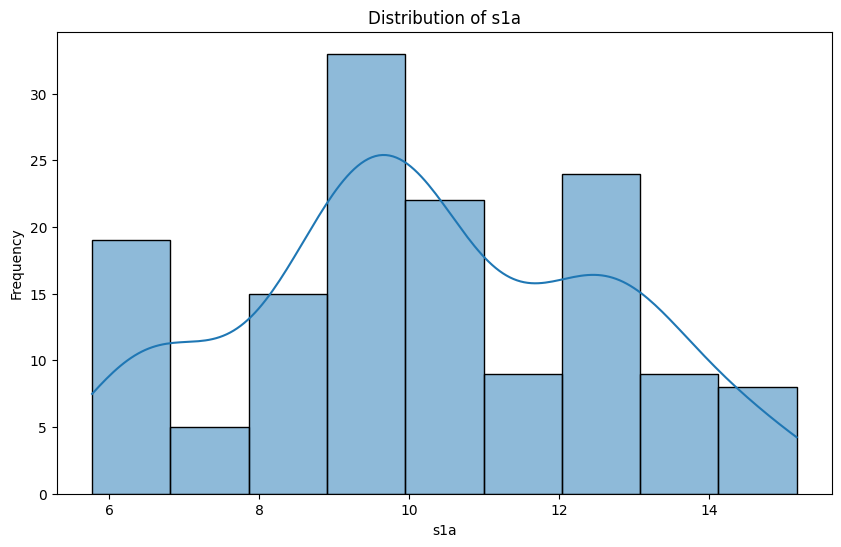


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      11.891712
std        3.124380
min        6.188000
25%        9.446900
50%       11.053400
75%       14.645075
max       19.361300
Name: s1x, dtype: float64


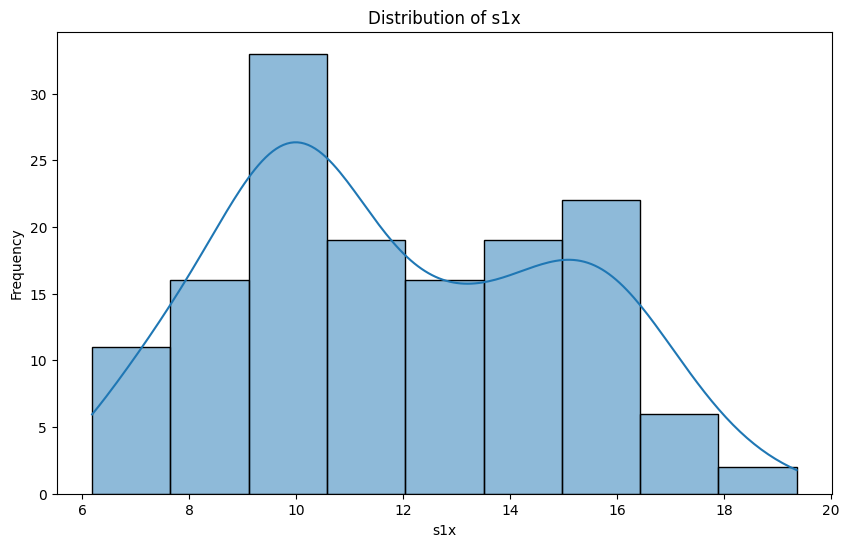


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       8.345619
std        1.732381
min        4.122500
25%        7.622375
50%        8.666600
75%        9.687875
max       11.879600
Name: s1i, dtype: float64


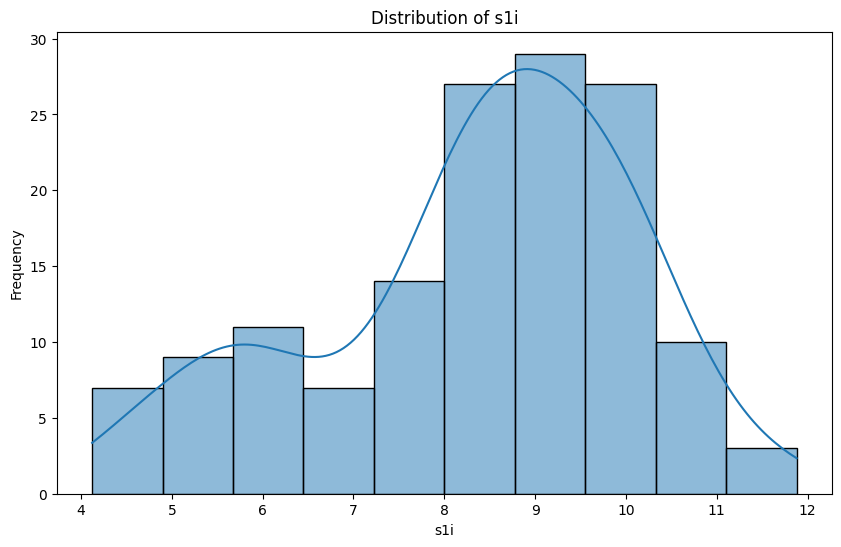


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.647796
std        0.390072
min        0.096390
25%        0.257040
50%        0.663255
75%        0.922590
max        1.702890
Name: s1s, dtype: float64


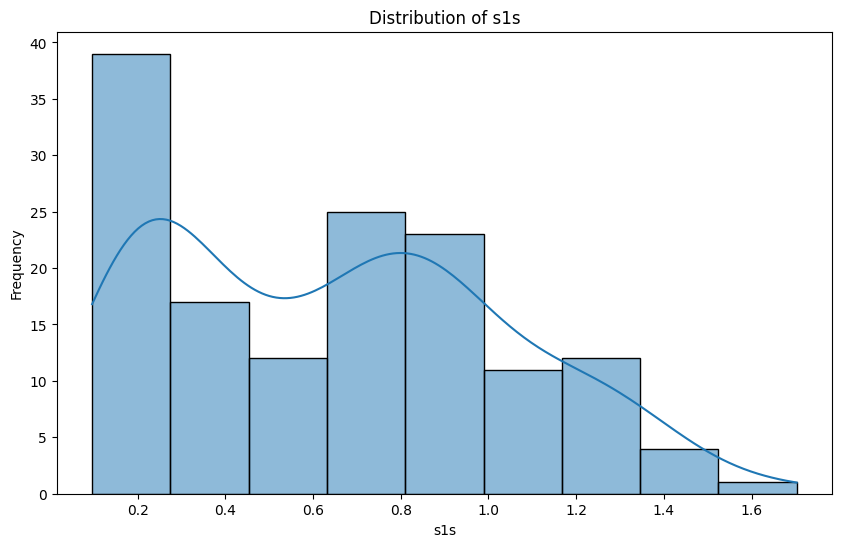


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean      10.193815
std        2.377584
min        5.769310
25%        8.783793
50%        9.959980
75%       12.272192
max       15.109960
Name: s2a, dtype: float64


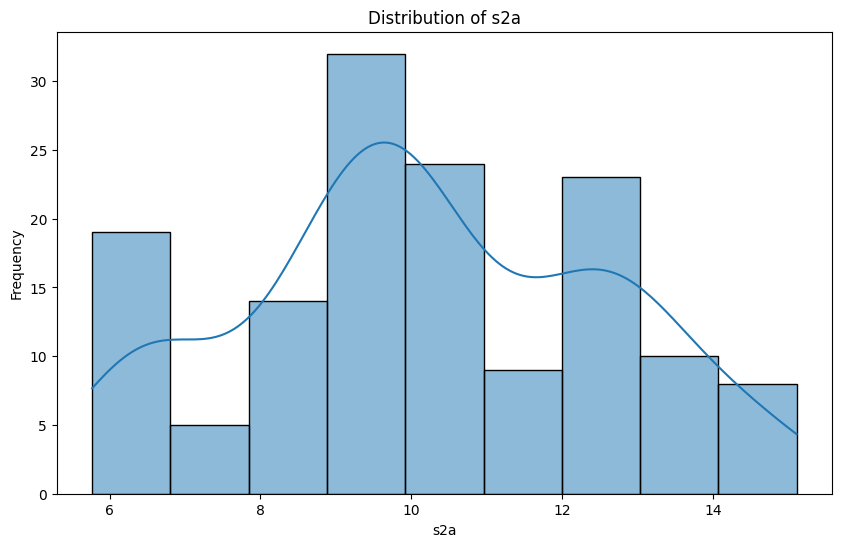


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      11.863300
std        3.109737
min        6.141100
25%        9.491800
50%       10.983550
75%       14.598175
max       19.498000
Name: s2x, dtype: float64


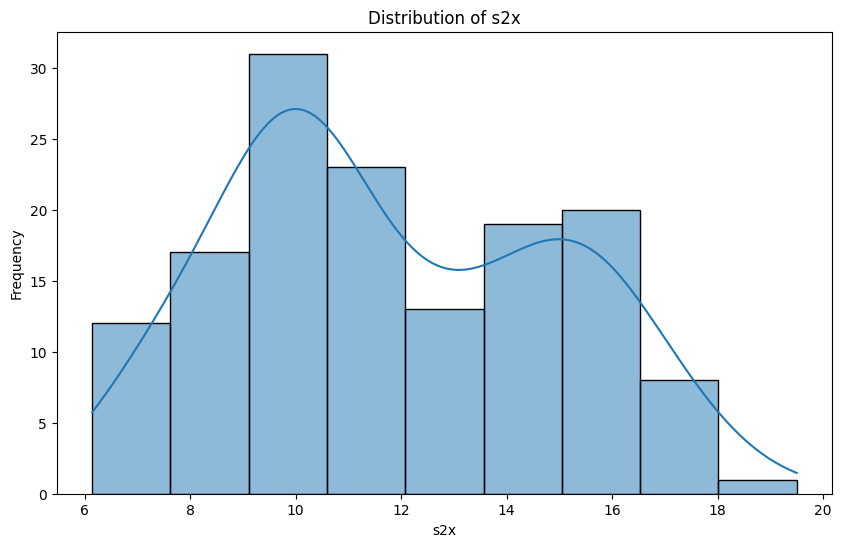


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       8.326131
std        1.734826
min        4.167400
25%        7.564000
50%        8.642650
75%        9.595075
max       11.878600
Name: s2i, dtype: float64


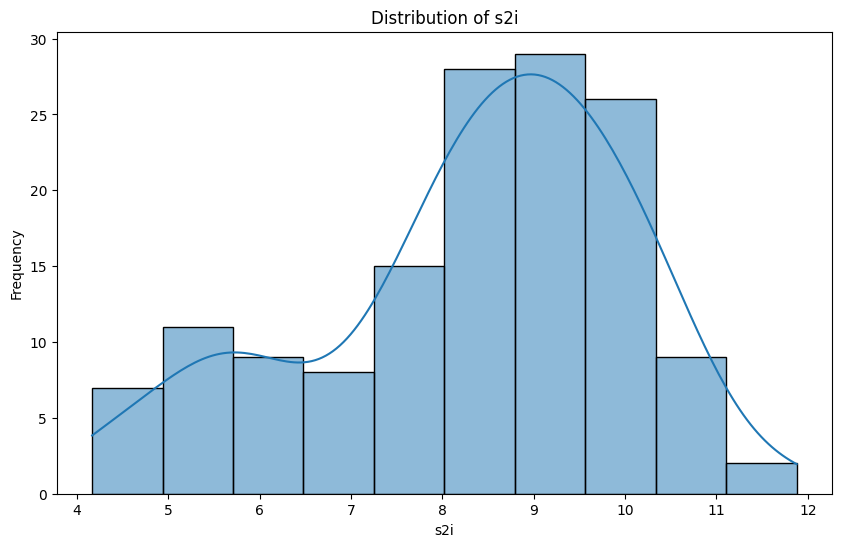


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.644927
std        0.386689
min        0.105570
25%        0.266220
50%        0.672435
75%        0.918000
max        1.666170
Name: s2s, dtype: float64


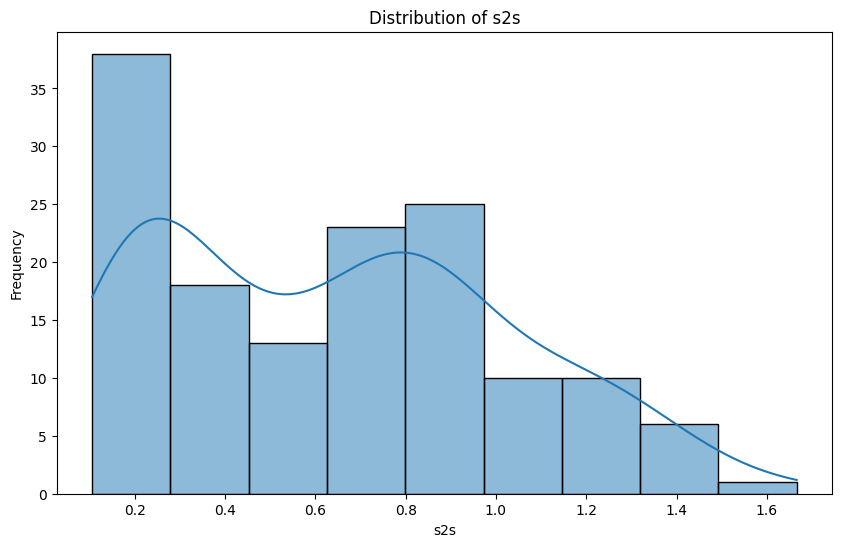


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       9.724015
std        2.411603
min        5.374200
25%        8.328230
50%        9.263980
75%       11.794853
max       14.892230
Name: s3a, dtype: float64


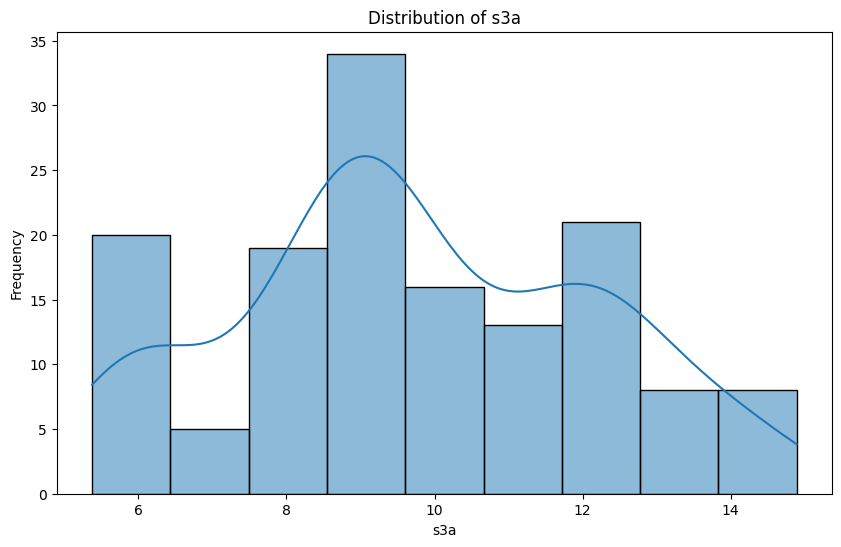


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      11.471980
std        3.239363
min        5.773270
25%        9.110312
50%       10.543750
75%       14.454168
max       19.121440
Name: s3x, dtype: float64


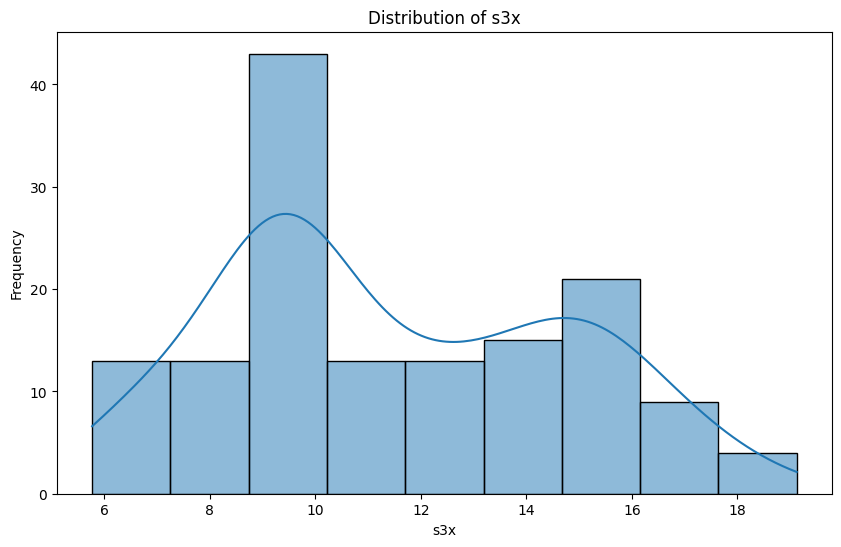


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       7.818307
std        1.693554
min        3.846730
25%        7.046162
50%        8.020900
75%        8.892430
max       10.864840
Name: s3i, dtype: float64


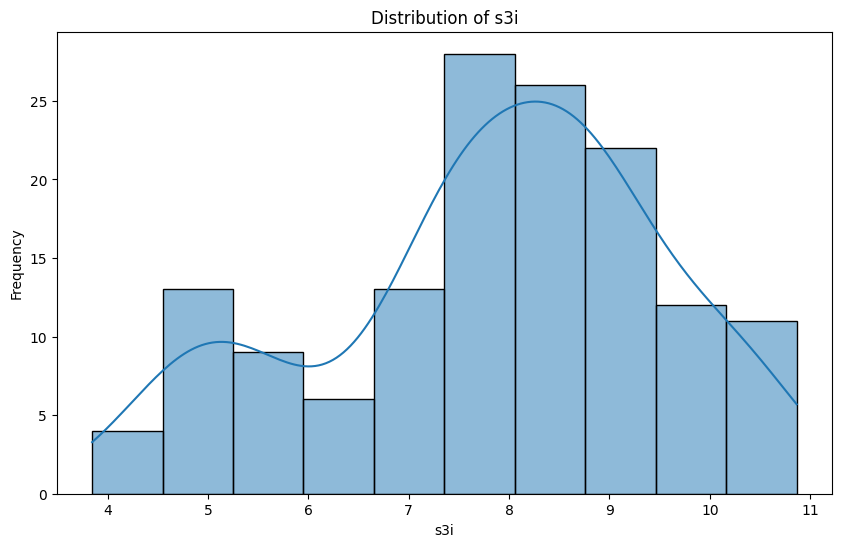


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.659954
std        0.411382
min        0.114680
25%        0.259165
50%        0.662820
75%        0.959827
max        1.779760
Name: s3s, dtype: float64


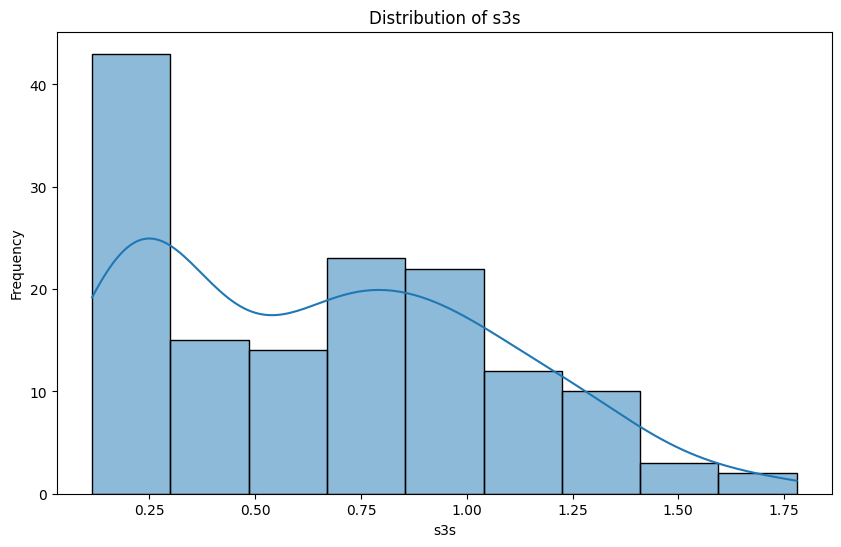


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean      92.937500
std       15.010588
min       68.000000
25%       82.000000
50%       91.500000
75%      104.000000
max      127.000000
Name: d1a, dtype: float64


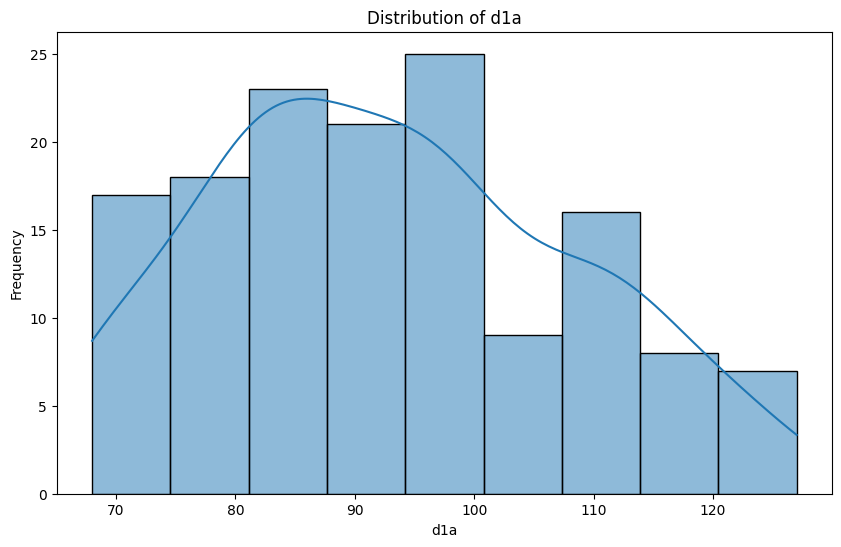


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       3.625000
std        1.839257
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        8.000000
Name: d1s, dtype: float64


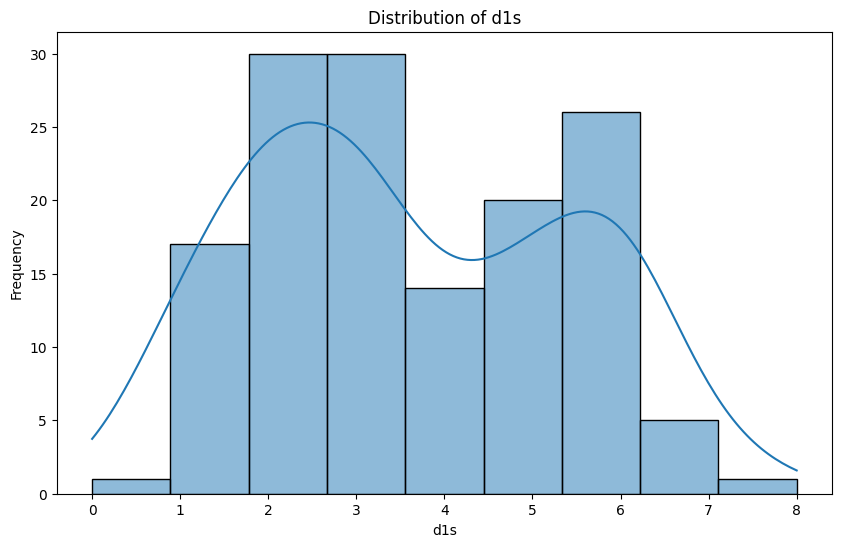


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      89.722222
std       11.160899
min       68.000000
25%       83.000000
50%       88.000000
75%       98.000000
max      114.000000
Name: d2a, dtype: float64


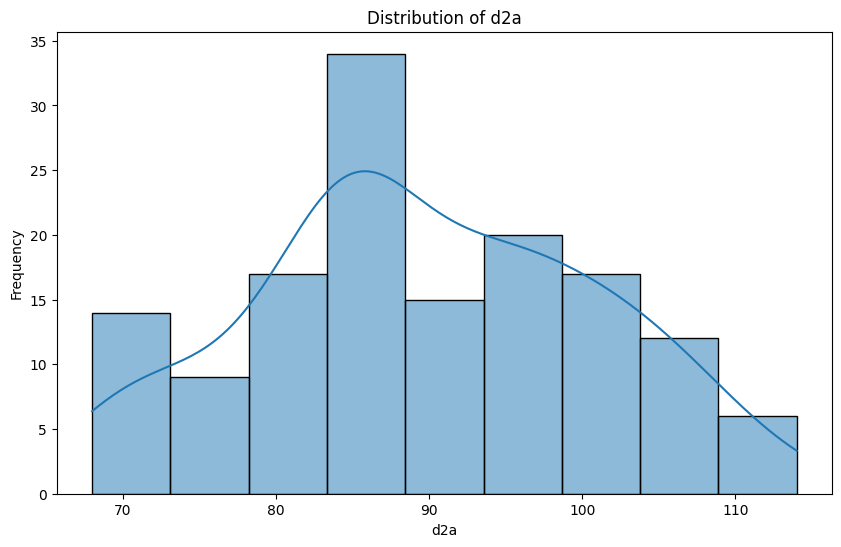


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       4.493056
std        1.999988
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: d2s, dtype: float64


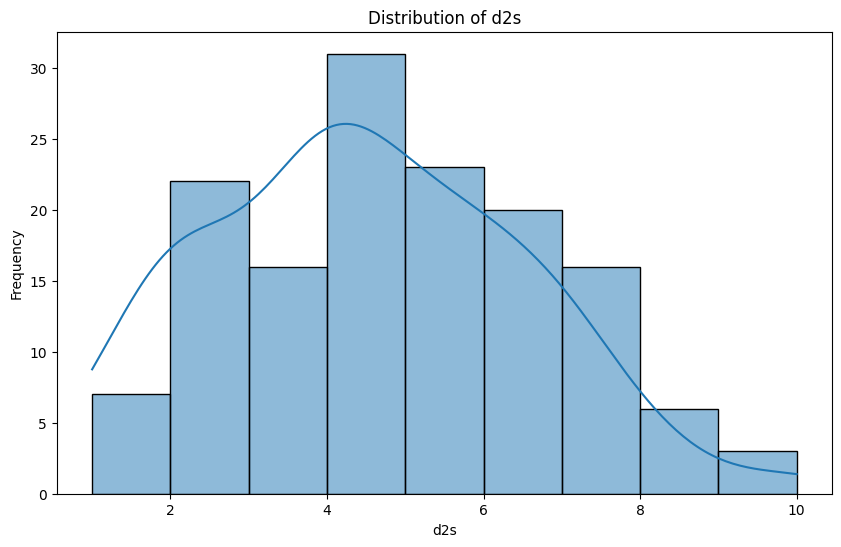


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      69.819444
std       12.413985
min       49.000000
25%       61.000000
50%       71.000000
75%       78.000000
max       92.000000
Name: h1a, dtype: float64


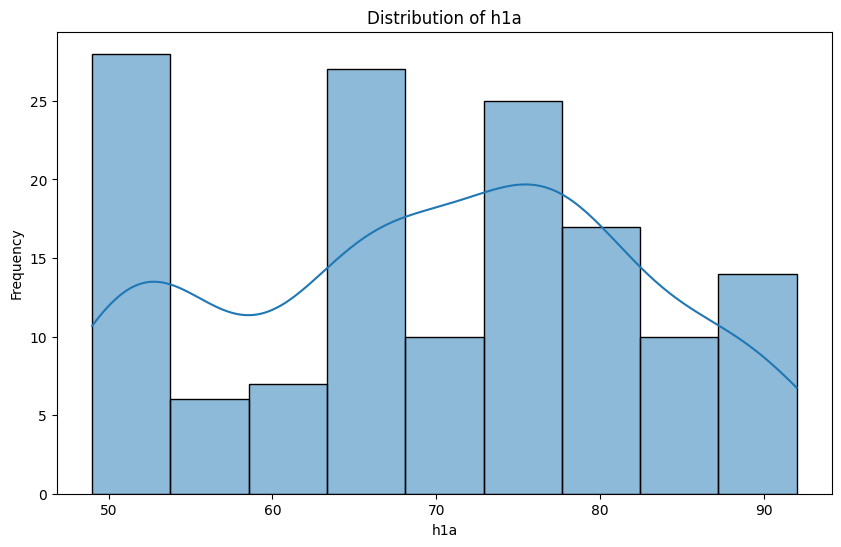


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      70.569444
std       12.451670
min       49.000000
25%       62.750000
50%       71.500000
75%       79.000000
max       92.000000
Name: h1x, dtype: float64


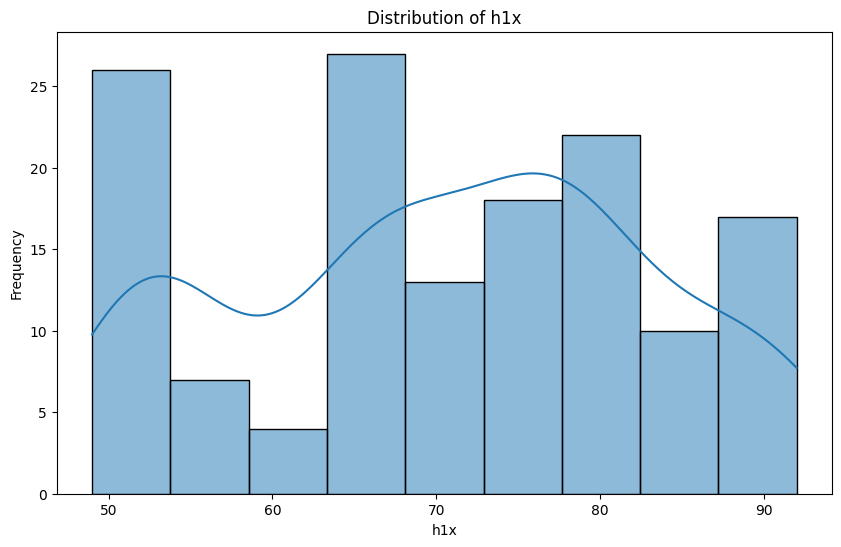


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      68.944444
std       12.365516
min       49.000000
25%       59.500000
50%       69.500000
75%       77.250000
max       91.000000
Name: h1i, dtype: float64


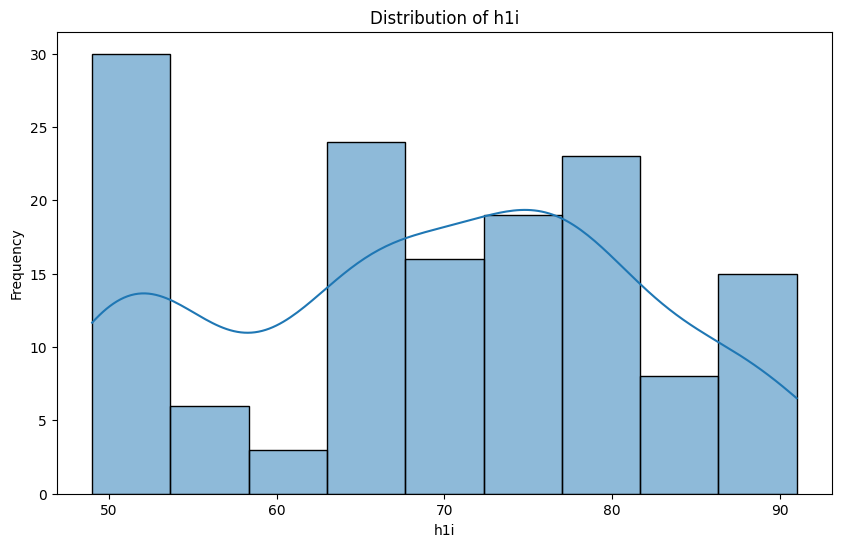


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       4.695139
std        3.067557
min       -0.850000
25%        2.550000
50%        4.150000
75%        7.250000
max        9.750000
Name: t1a, dtype: float64


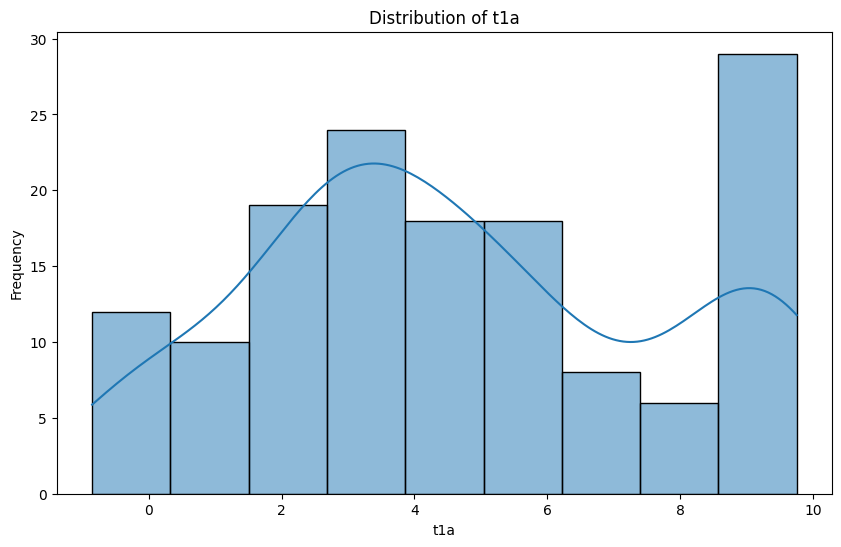


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       4.827778
std        3.063533
min       -0.750000
25%        2.750000
50%        4.250000
75%        7.550000
max        9.750000
Name: t1x, dtype: float64


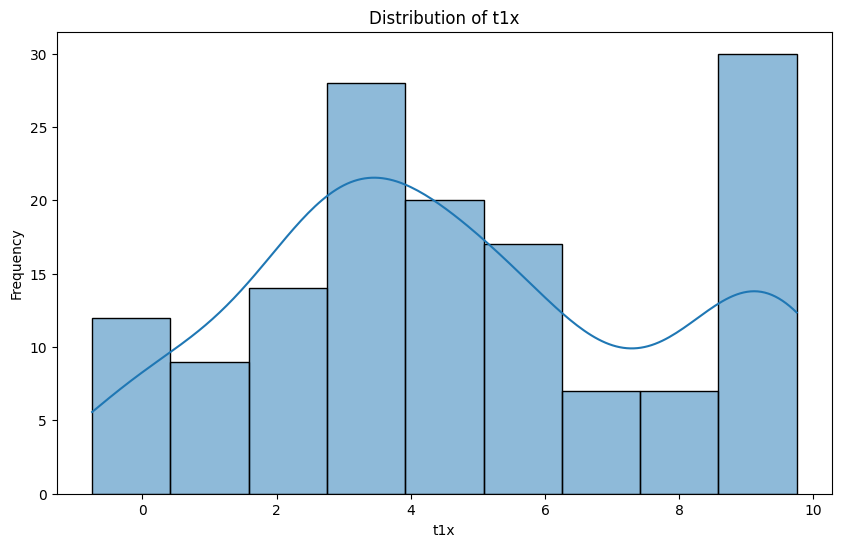


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       4.556944
std        3.076704
min       -0.850000
25%        2.450000
50%        4.100000
75%        6.800000
max        9.650000
Name: t1i, dtype: float64


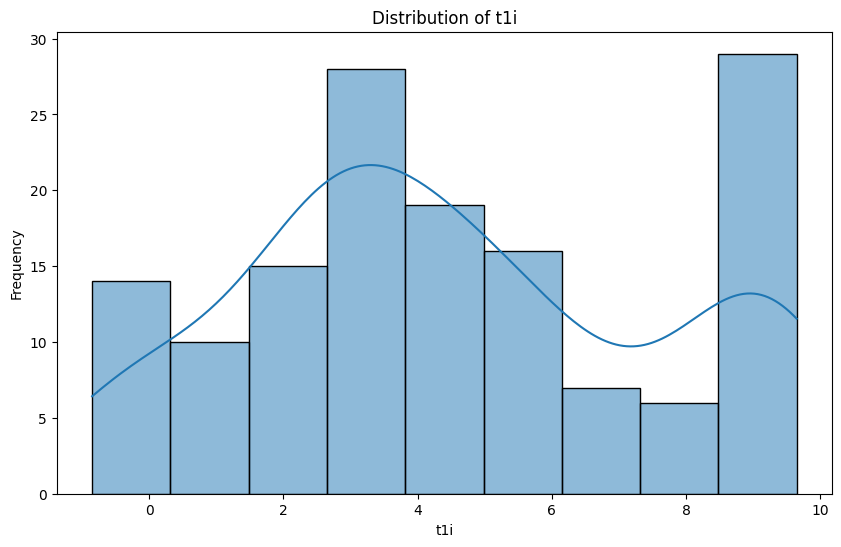


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1009.034722
std         1.640455
min      1006.000000
25%      1008.000000
50%      1009.000000
75%      1011.000000
max      1012.000000
Name: b1a, dtype: float64


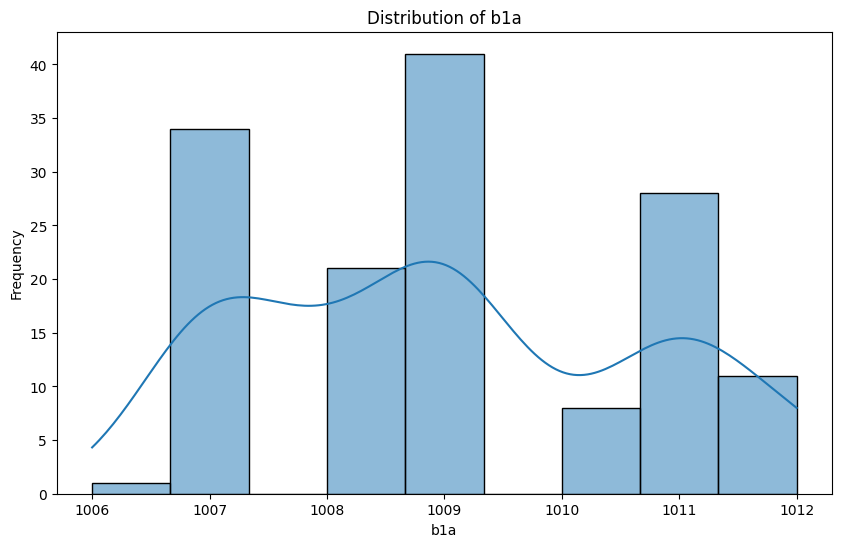


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1009.361111
std         1.704011
min      1007.000000
25%      1008.000000
50%      1009.000000
75%      1011.000000
max      1013.000000
Name: b1x, dtype: float64


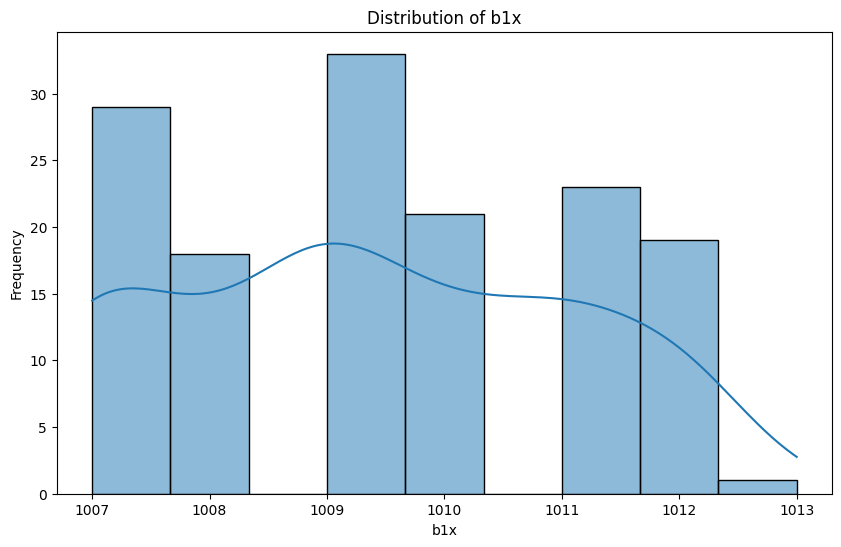


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1008.548611
std         1.713092
min      1006.000000
25%      1007.000000
50%      1009.000000
75%      1010.000000
max      1012.000000
Name: b1i, dtype: float64


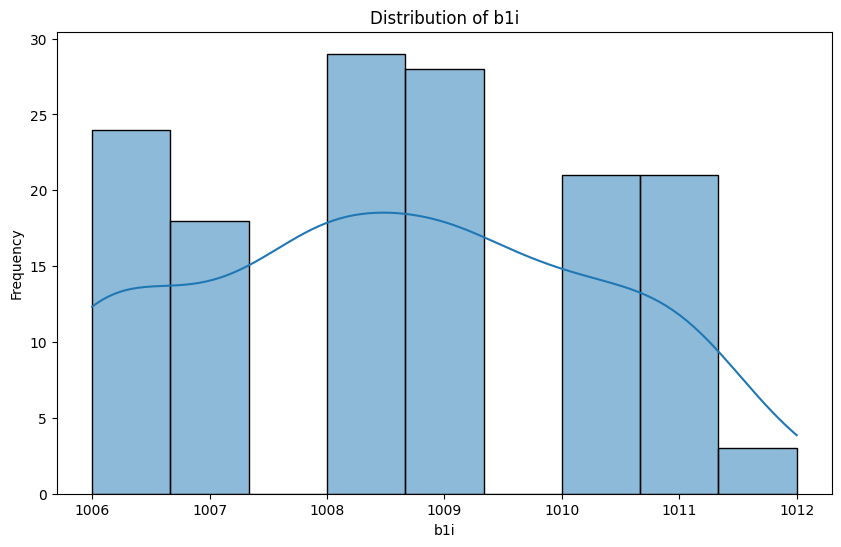


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       8.697675
std        2.565984
min        4.409520
25%        6.750167
50%        8.038550
75%       10.773505
max       14.143480
Name: p1a, dtype: float64


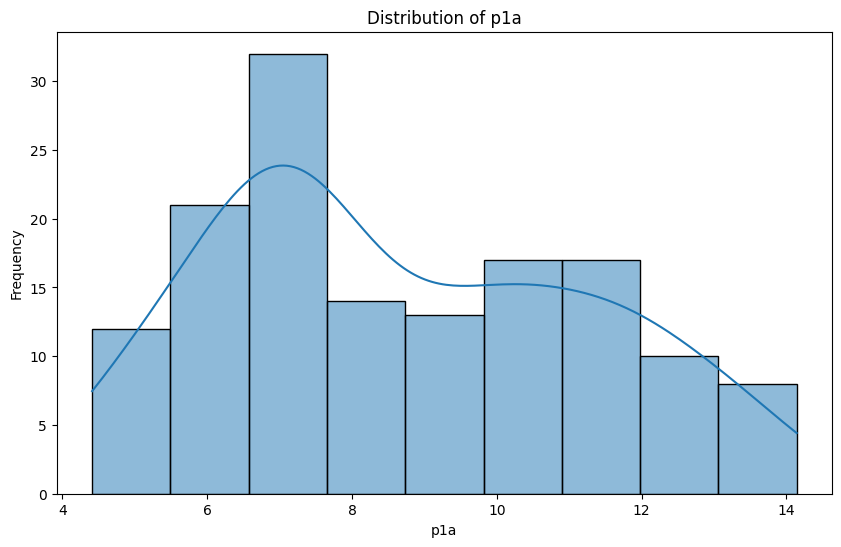


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      10.560170
std        3.580061
min        5.133950
25%        7.609850
50%        9.856500
75%       13.432800
max       20.081050
Name: p1x, dtype: float64


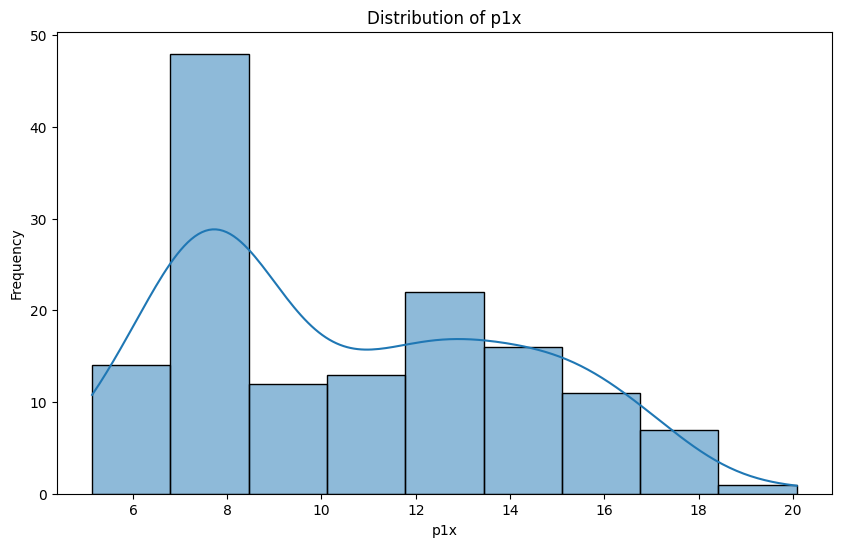


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       6.634582
std        1.578321
min        3.666750
25%        5.752925
50%        6.509450
75%        7.804712
max       10.223300
Name: p1i, dtype: float64


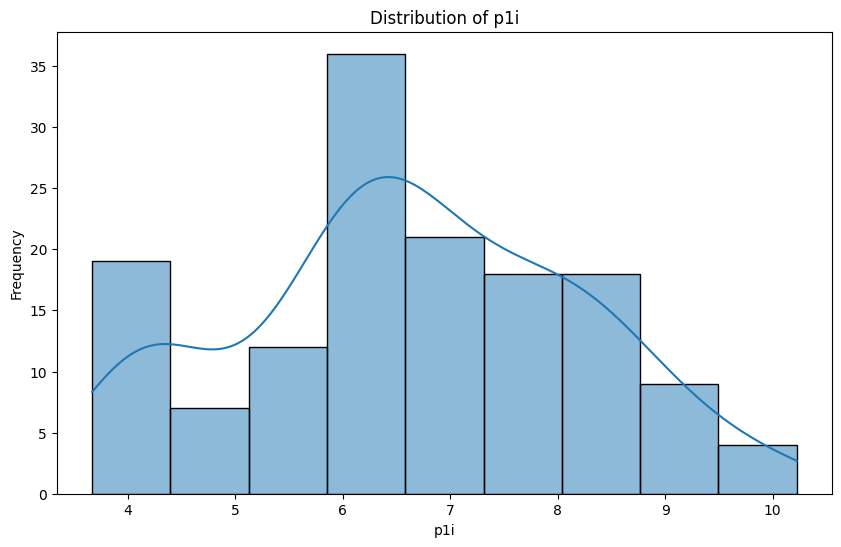


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.705902
std        0.439531
min        0.132970
25%        0.301465
50%        0.648780
75%        1.032775
max        2.044910
Name: p1s, dtype: float64


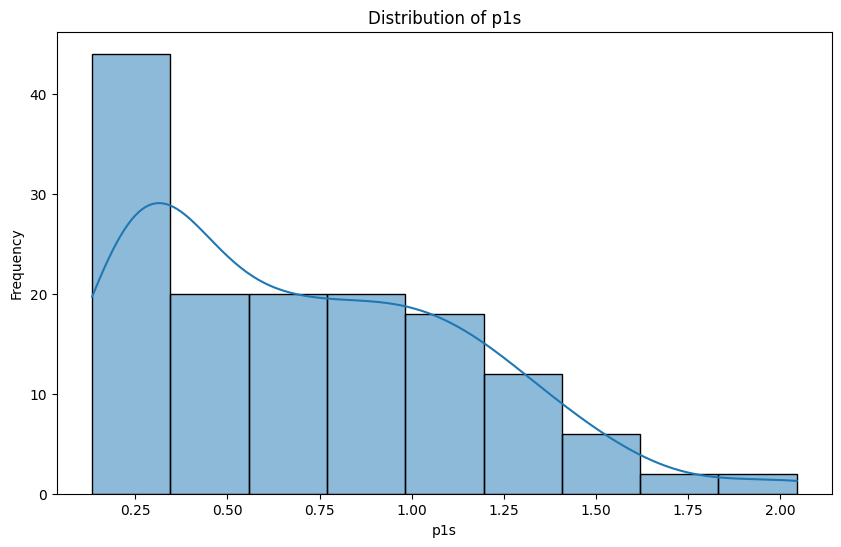


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      44.506944
std        5.126370
min       37.000000
25%       39.750000
50%       45.000000
75%       49.000000
max       52.000000
Name: tia, dtype: float64


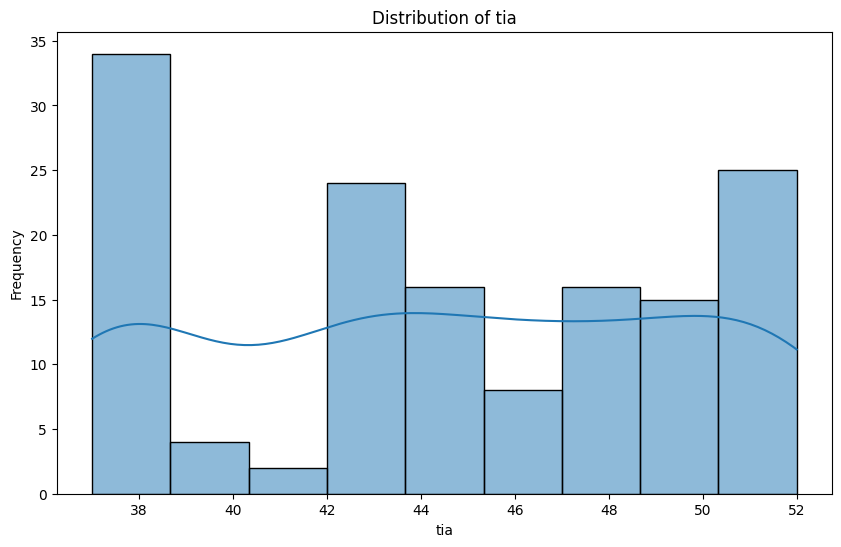


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      44.618056
std        5.119545
min       37.000000
25%       40.000000
50%       45.000000
75%       49.000000
max       52.000000
Name: tix, dtype: float64


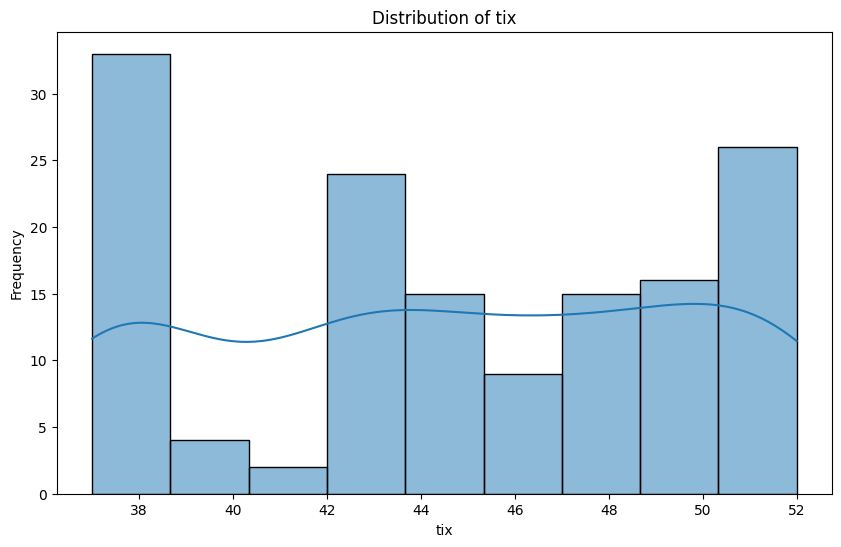


Analysis for column: tii
Descriptive Statistics:
count    144.00000
mean      44.43750
std        5.09589
min       37.00000
25%       39.75000
50%       44.50000
75%       49.00000
max       52.00000
Name: tii, dtype: float64


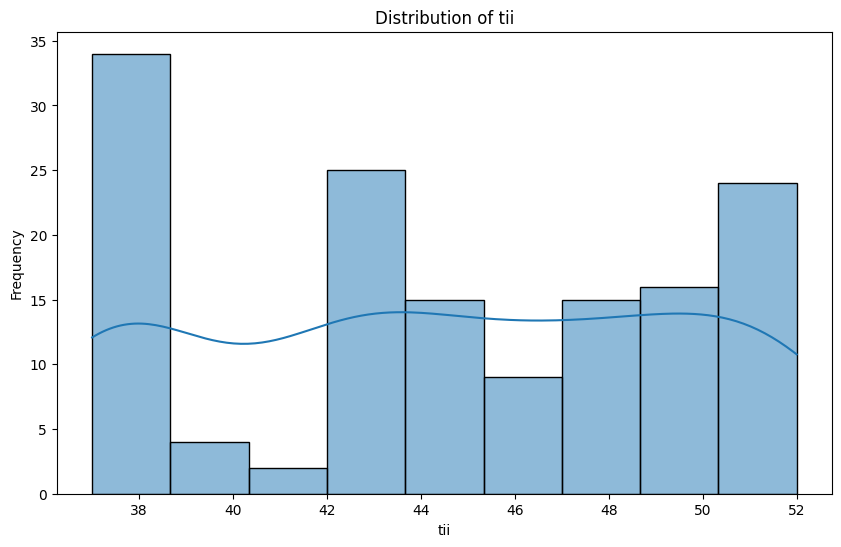


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.597222
std        5.400491
min      125.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      140.000000
Name: vxa, dtype: float64


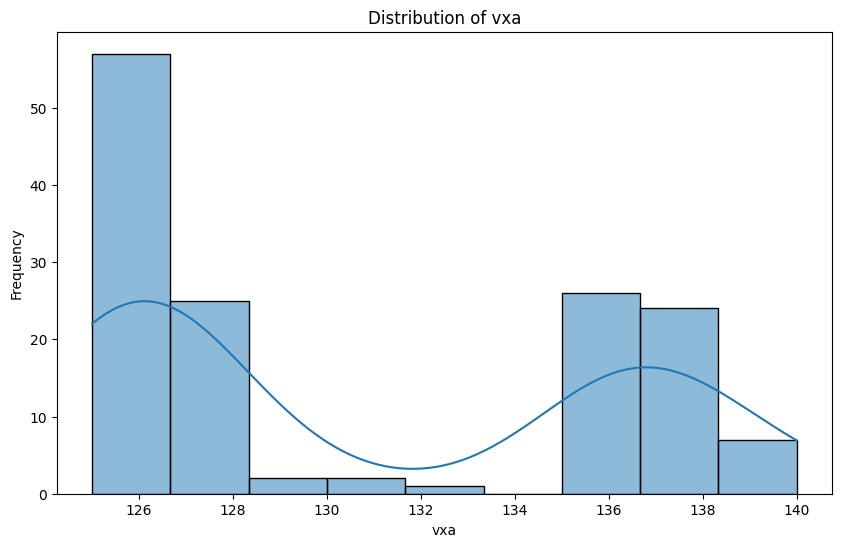


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.854167
std        5.505203
min      125.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      140.000000
Name: vxx, dtype: float64


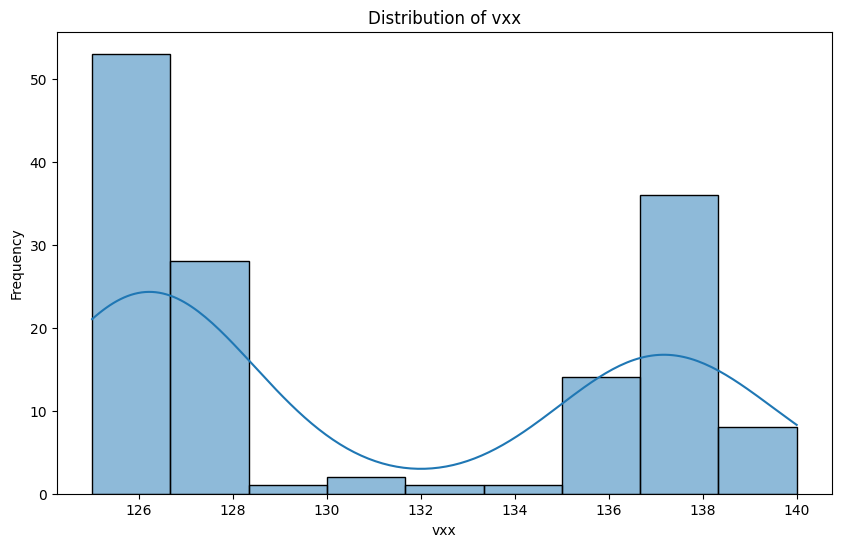


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.340278
std        5.223887
min      124.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      139.000000
Name: vxi, dtype: float64


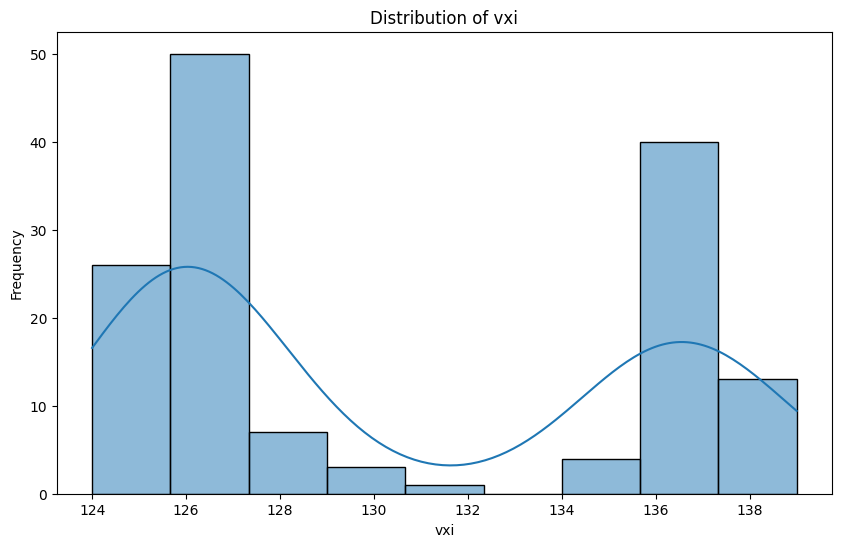


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


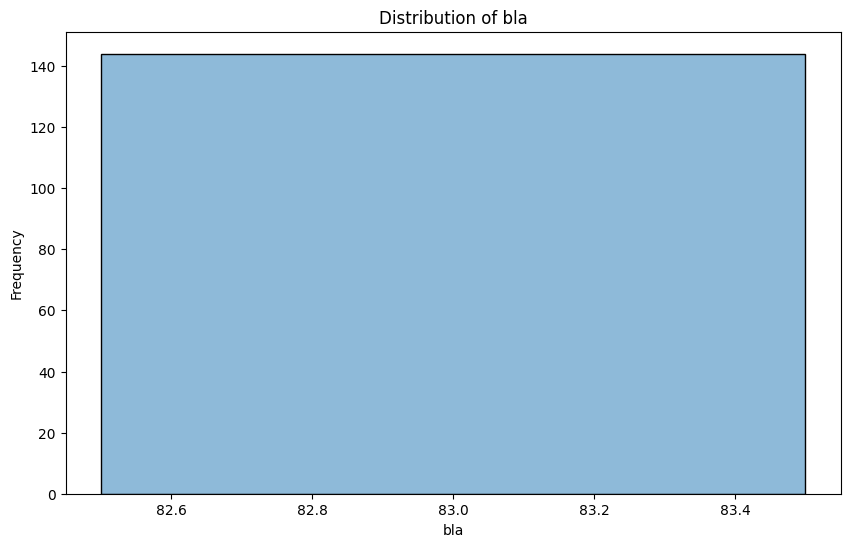


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


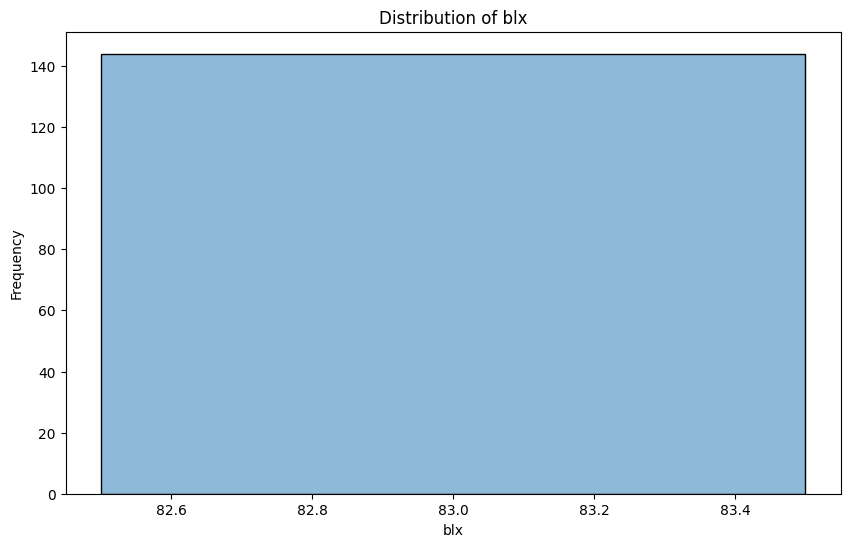


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


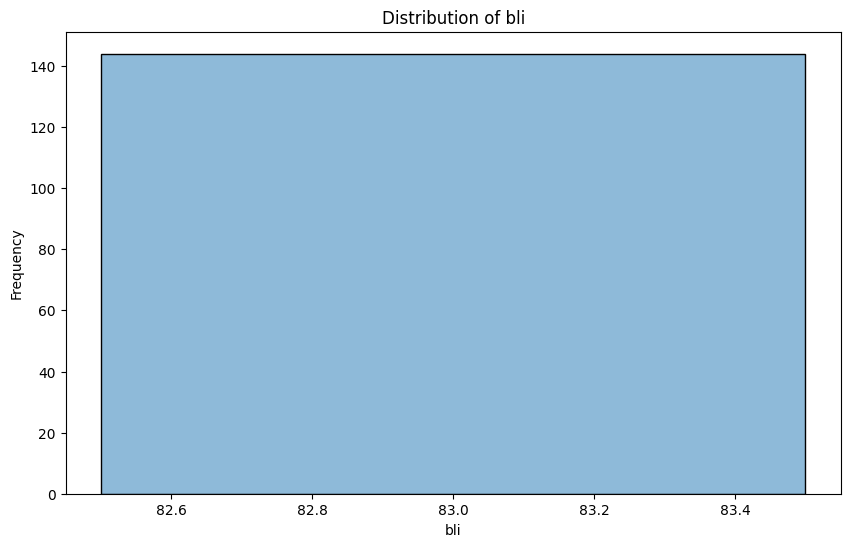


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


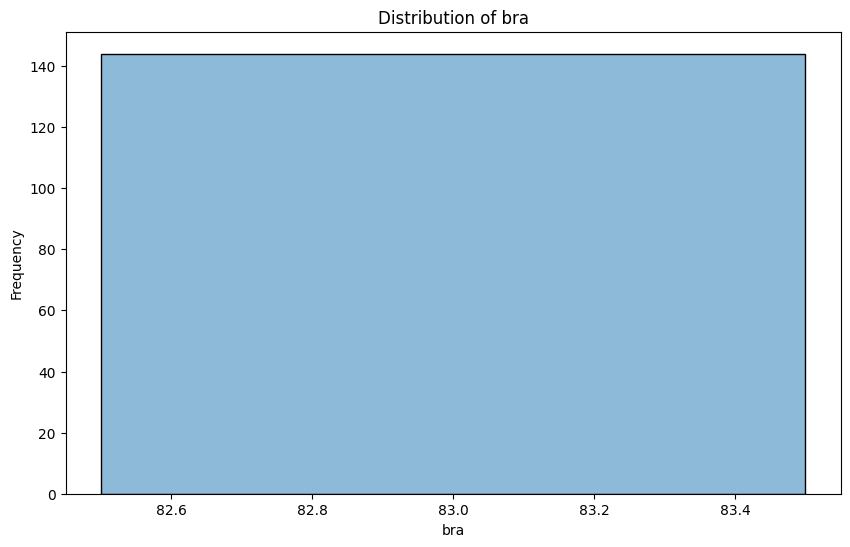


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


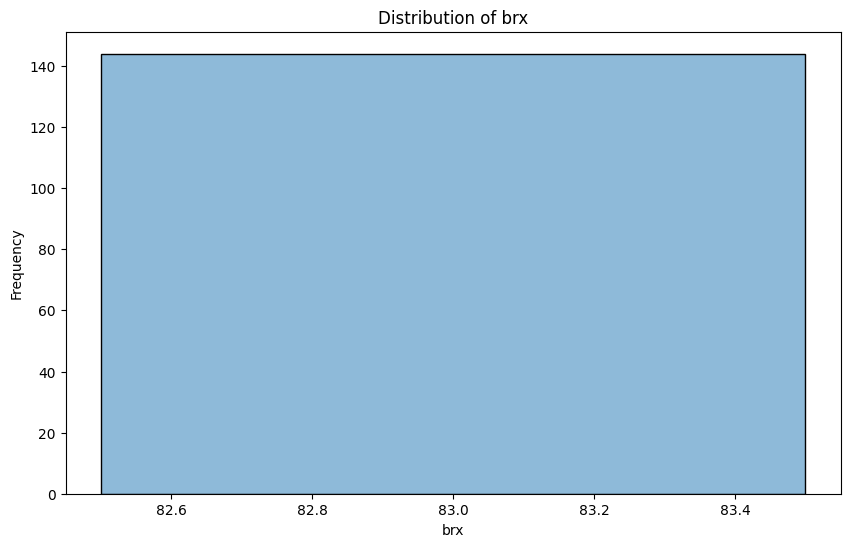


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


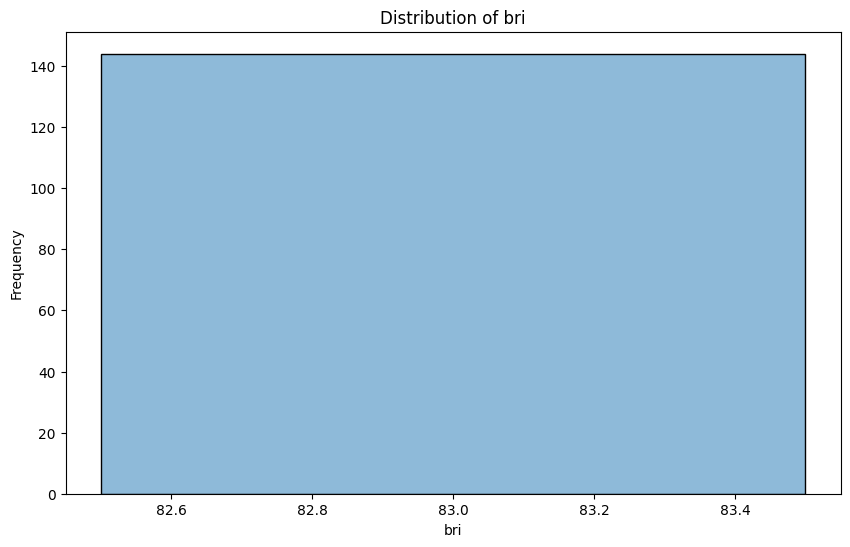

In [99]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

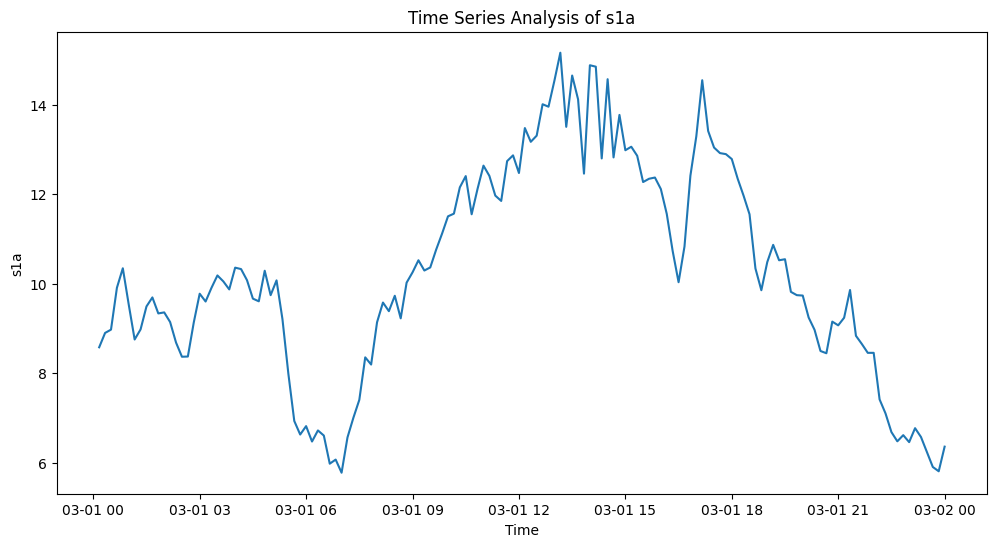

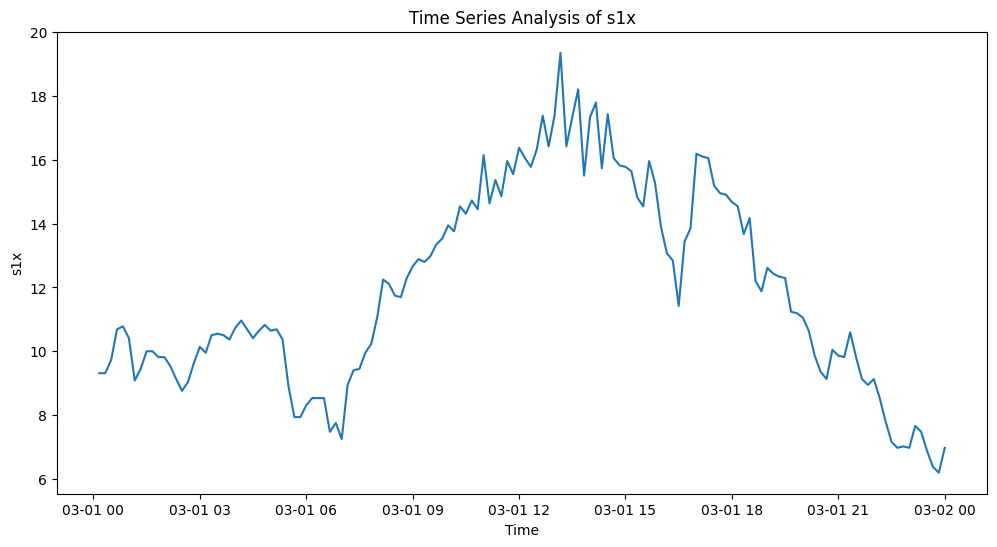

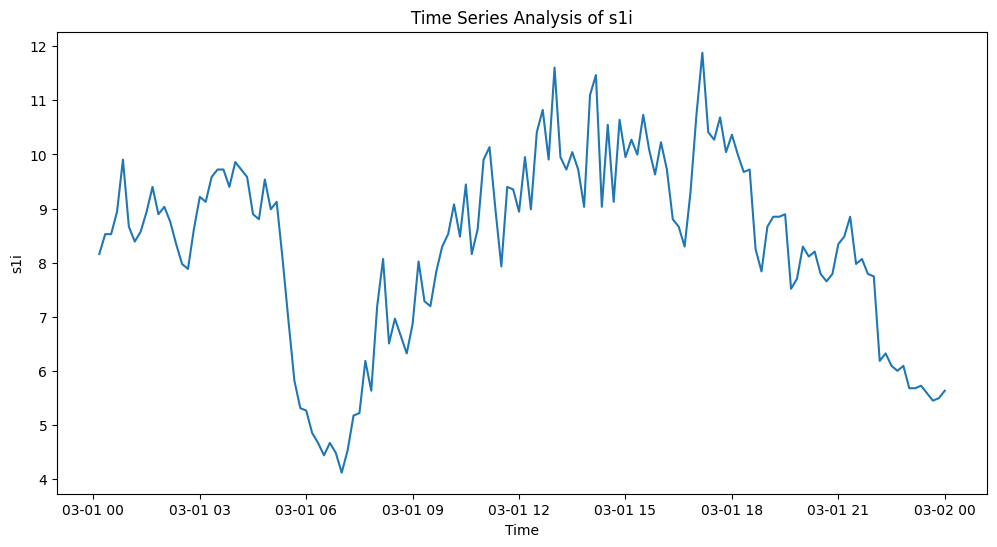

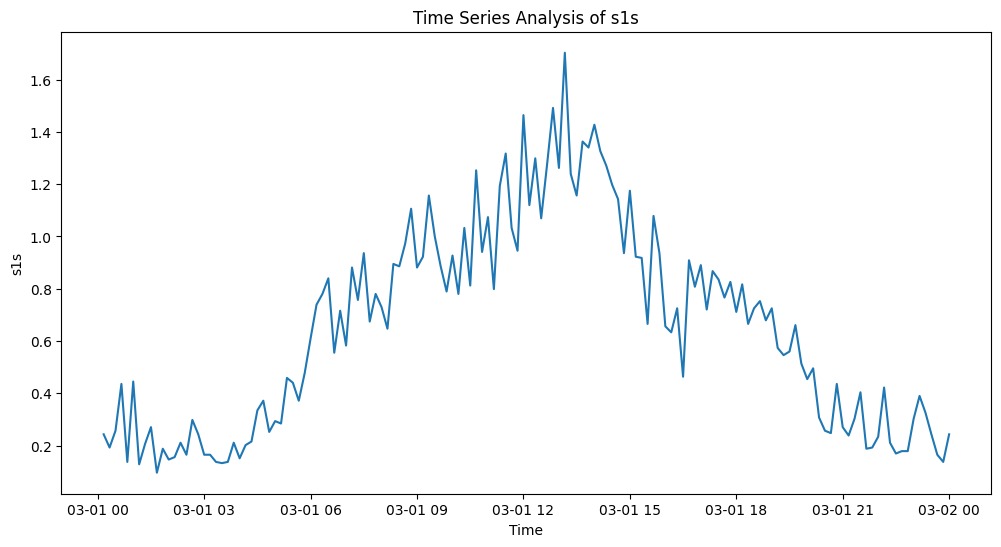

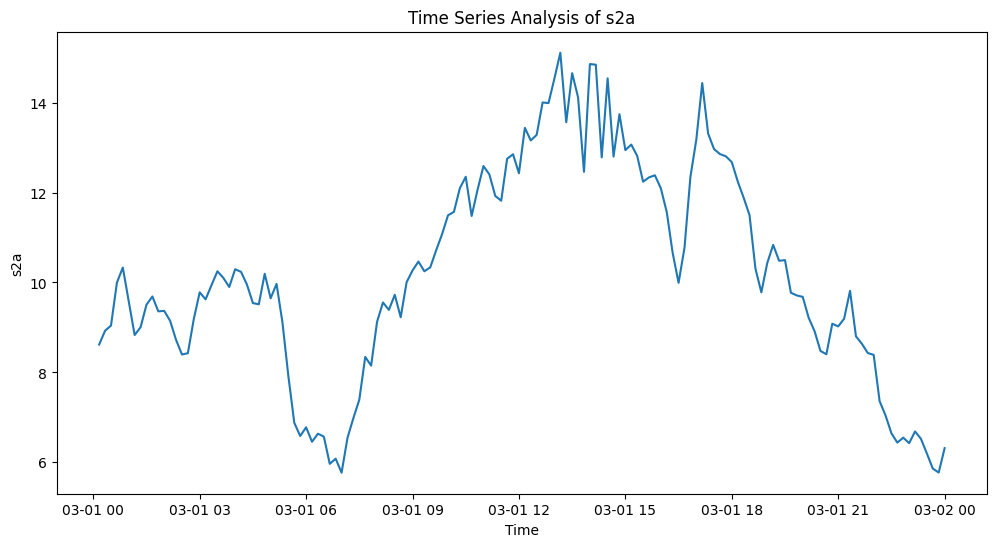

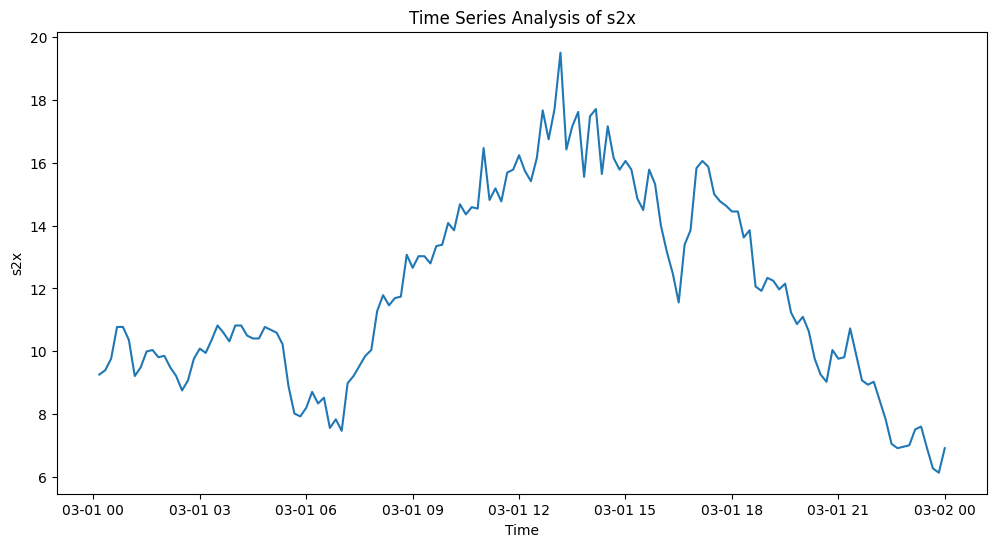

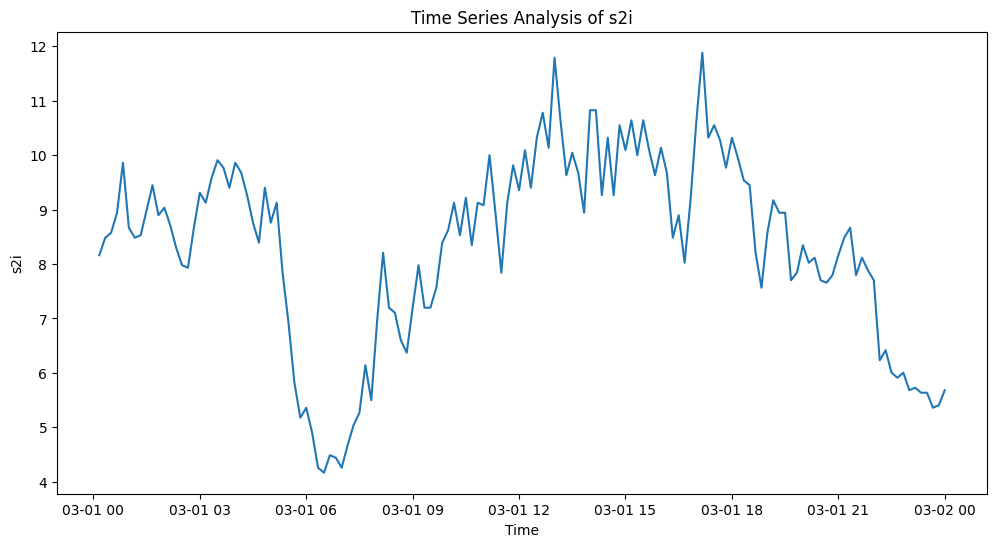

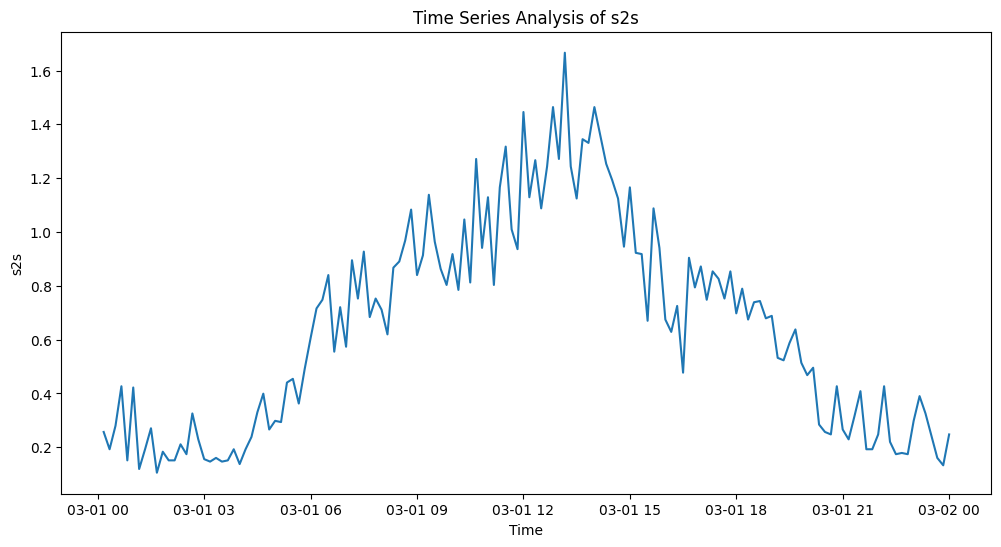

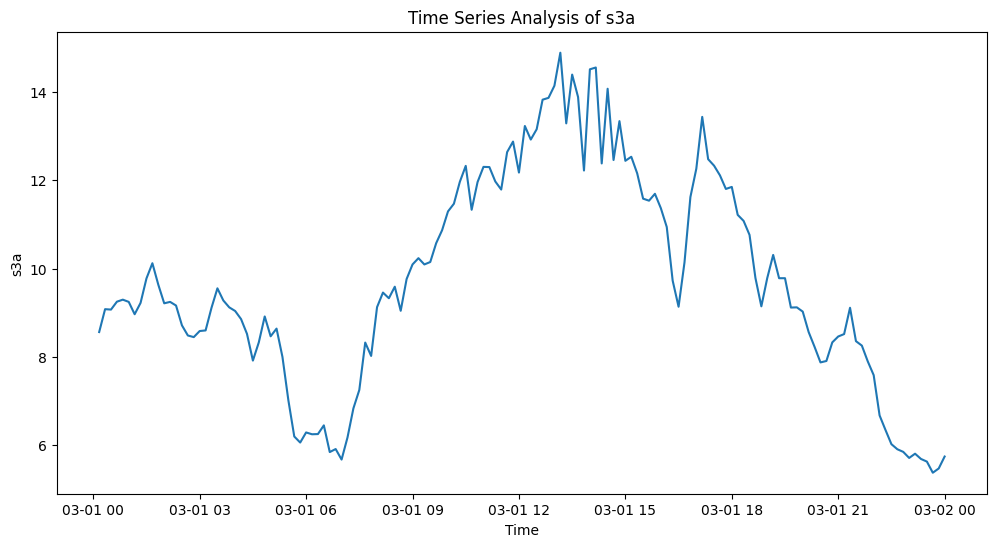

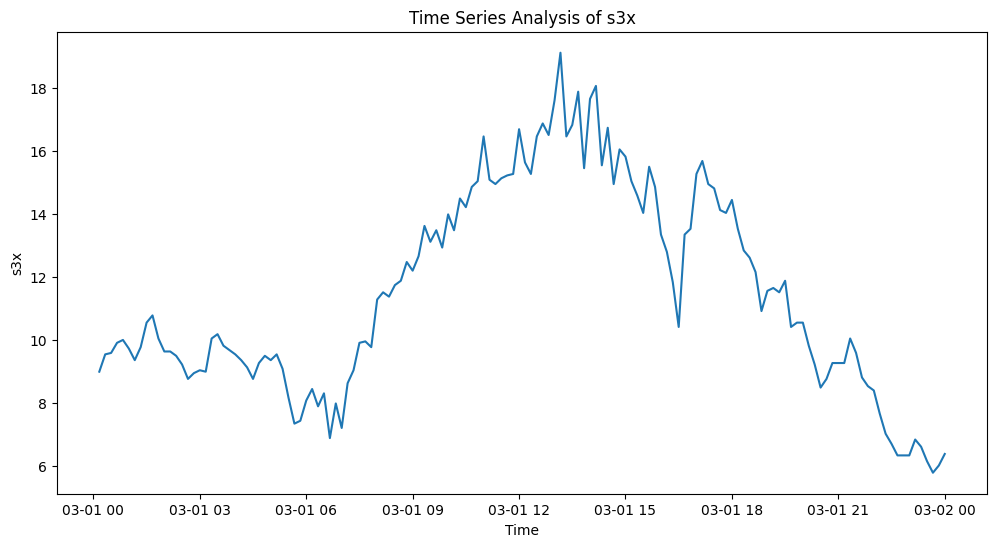

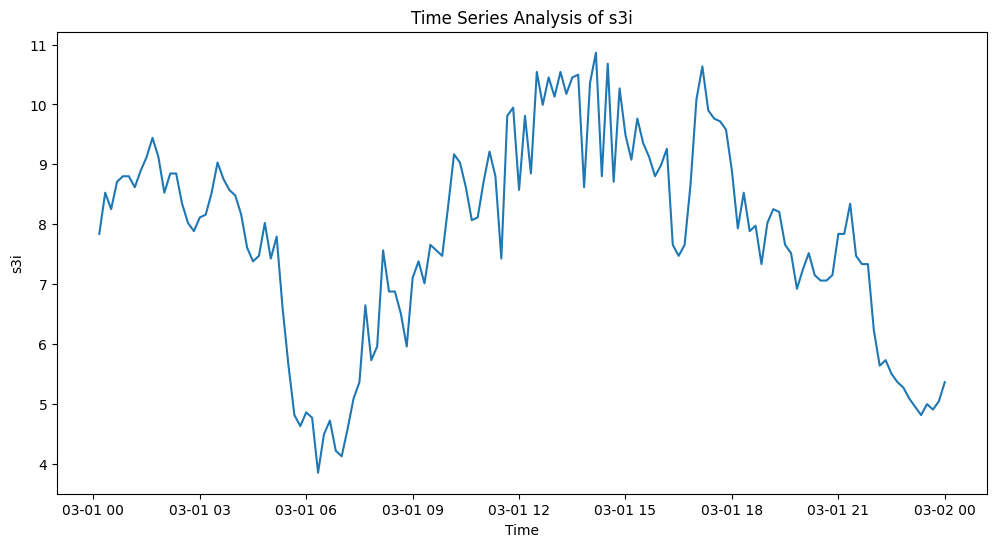

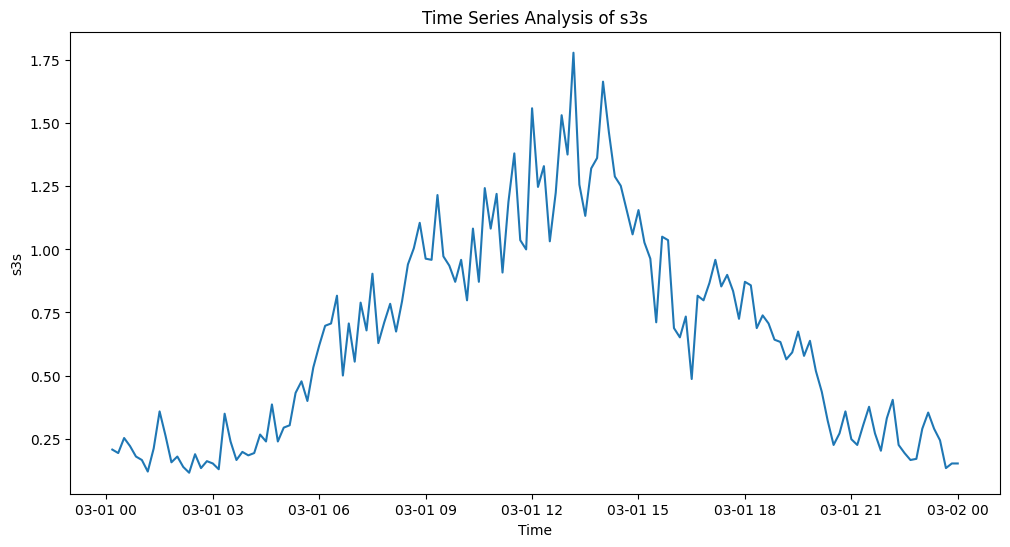

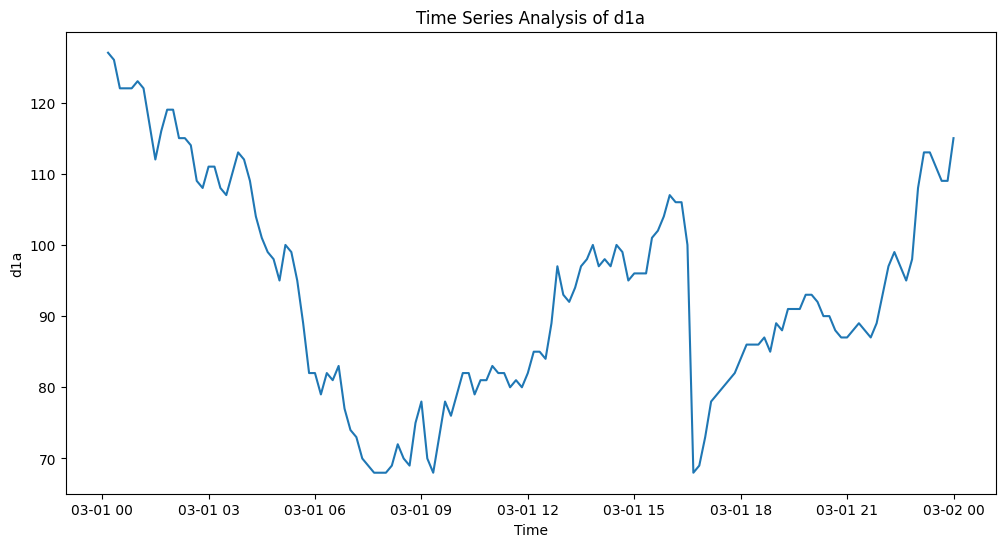

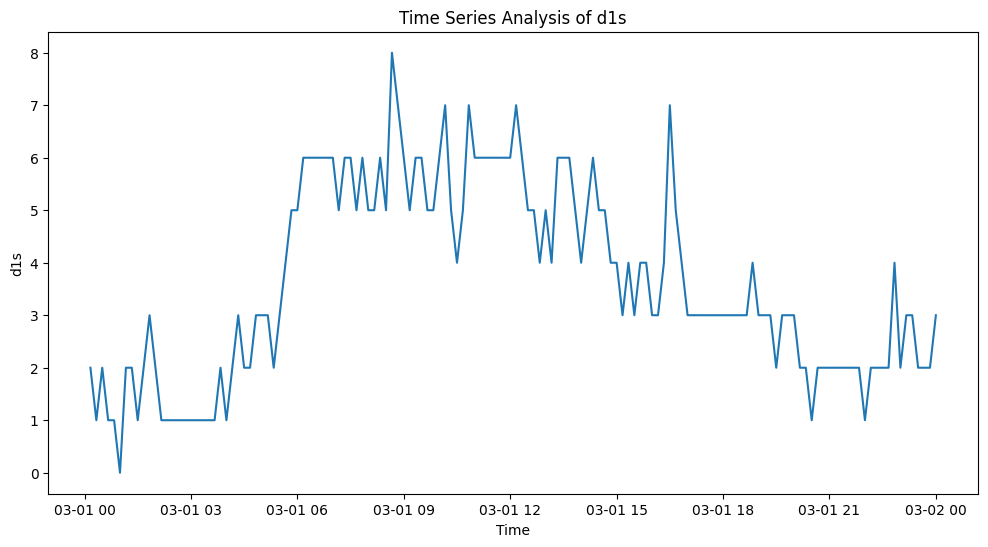

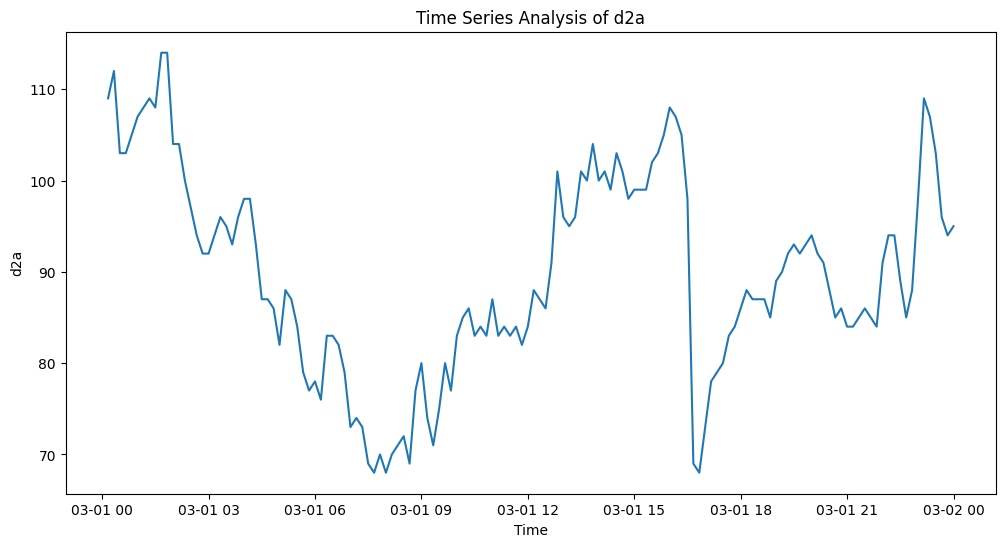

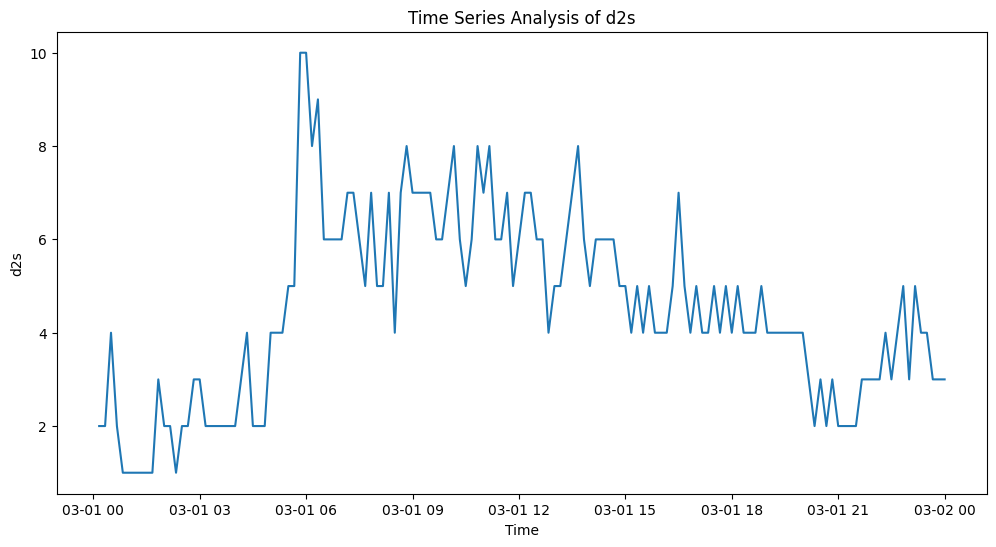

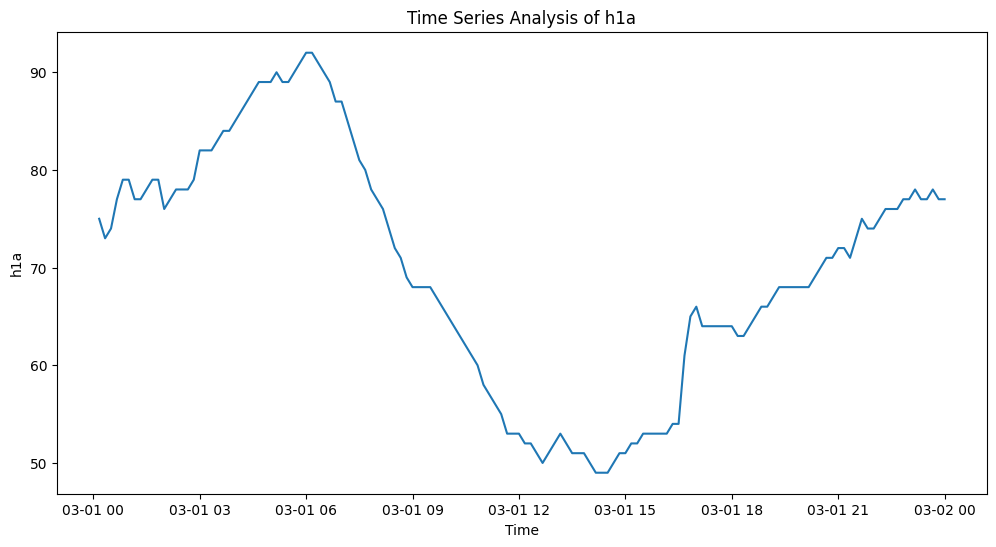

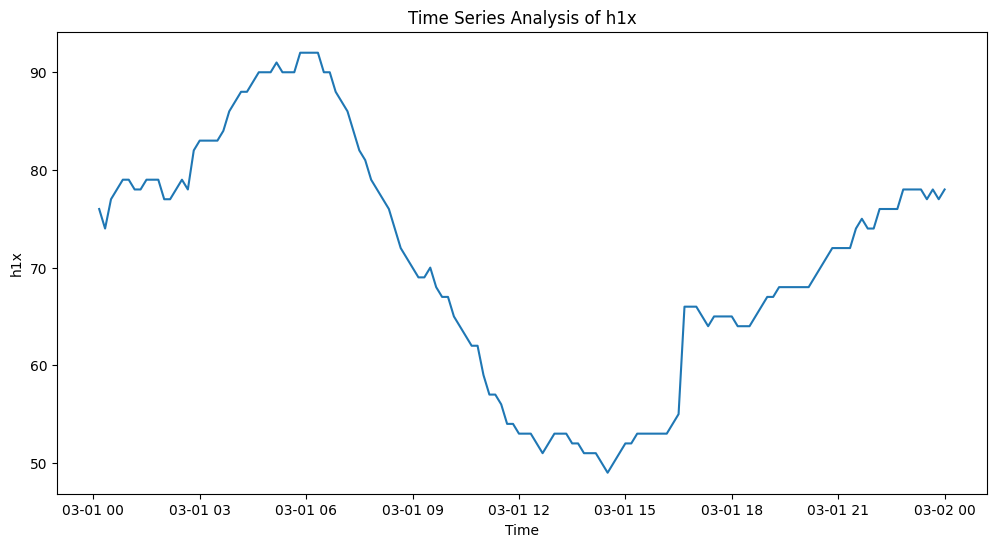

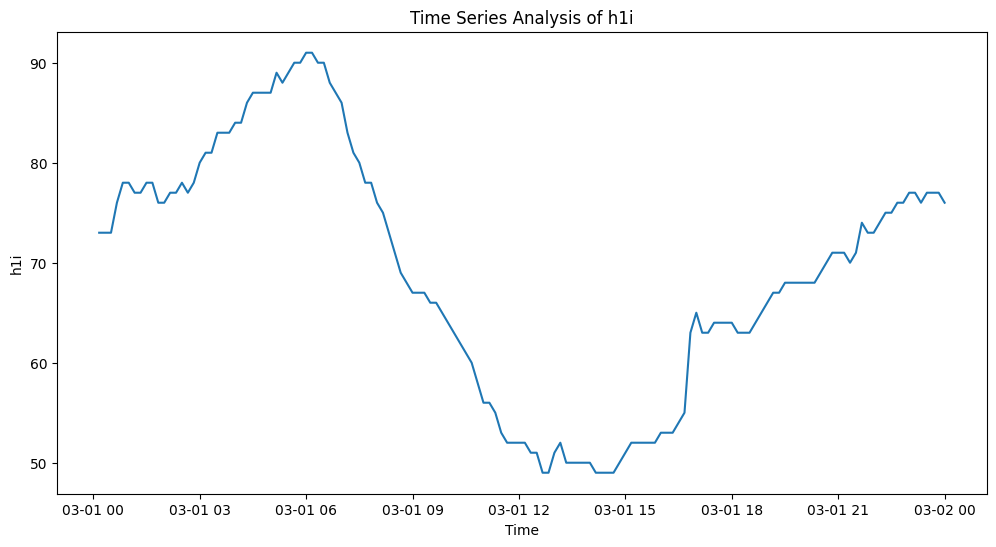

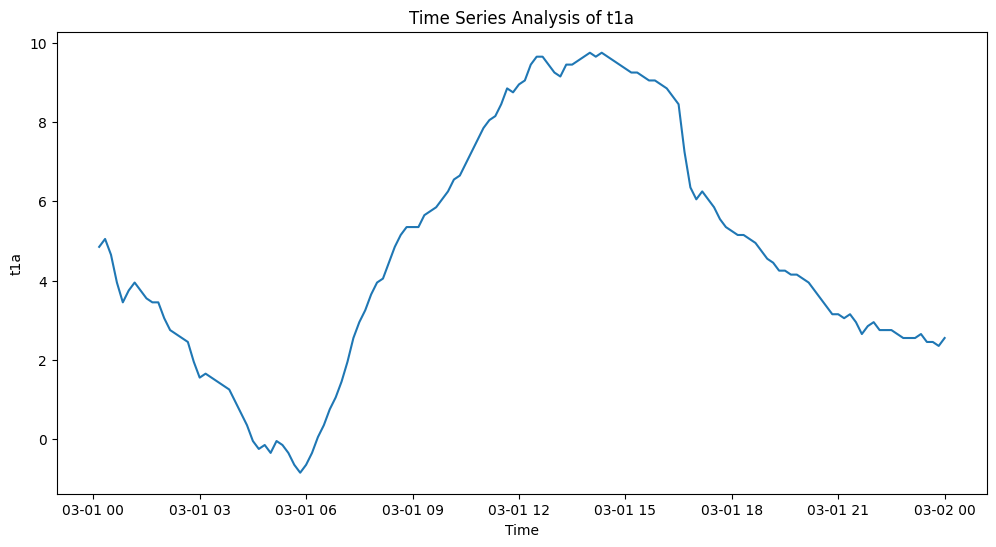

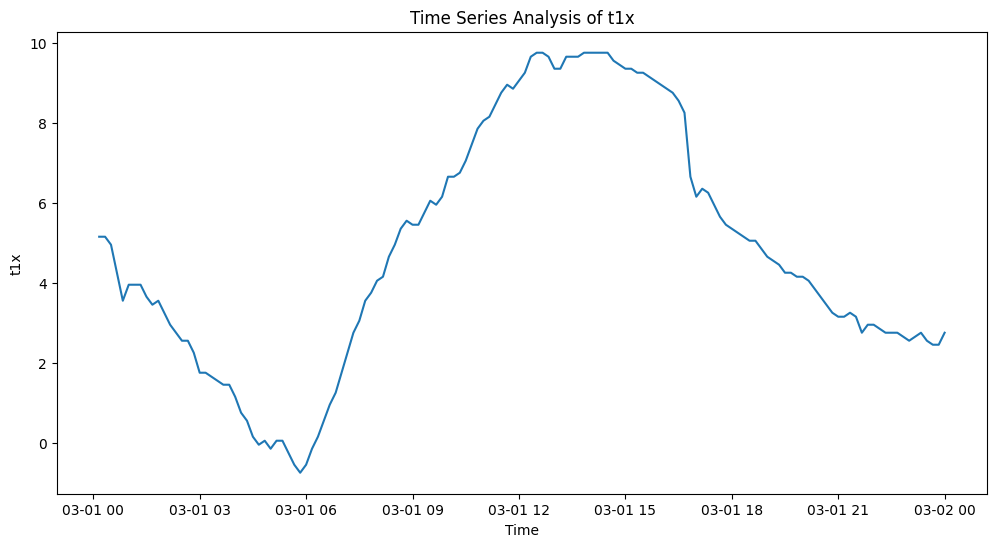

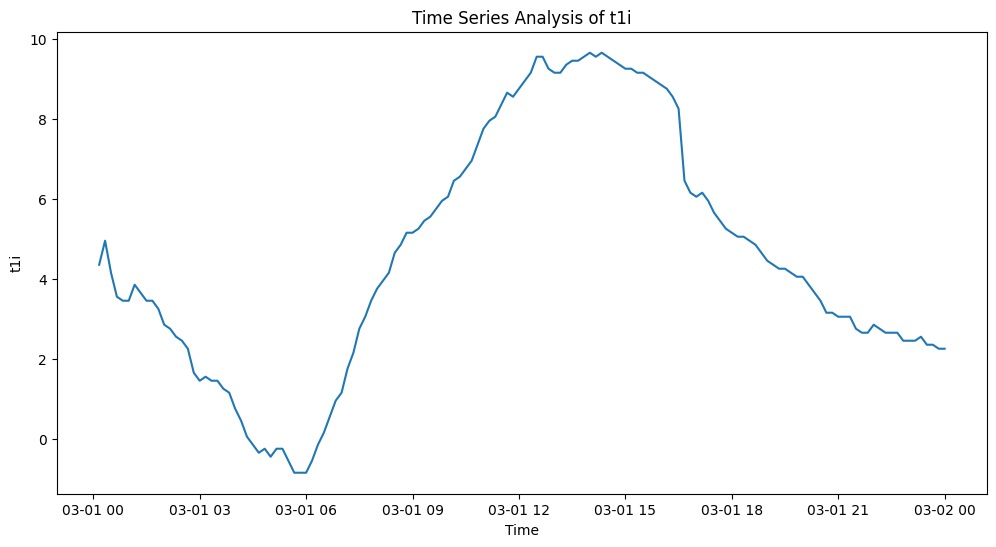

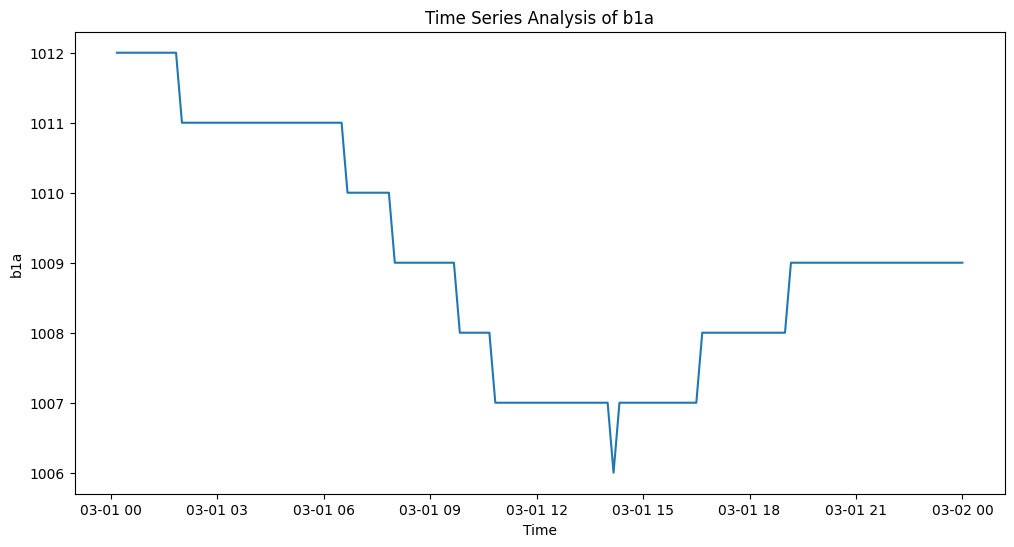

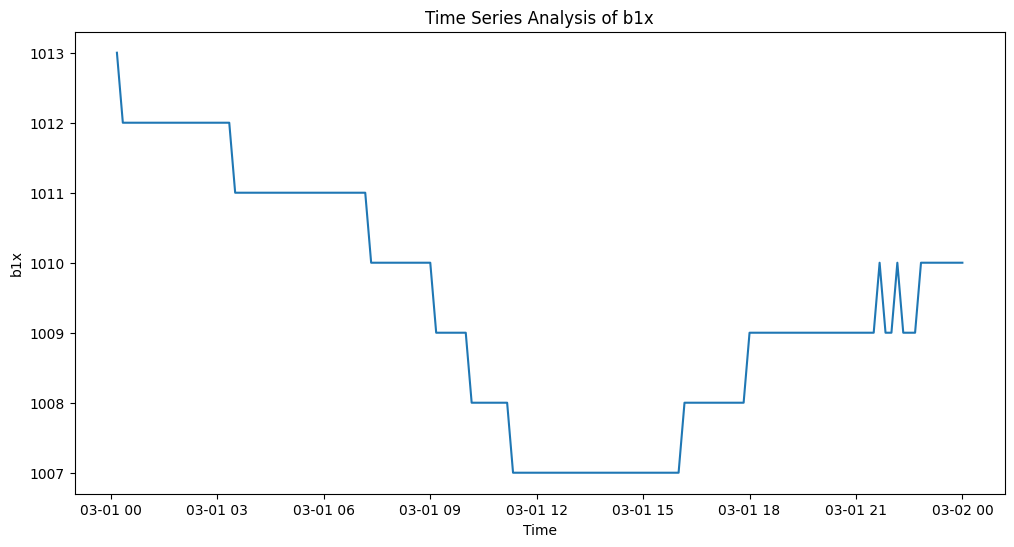

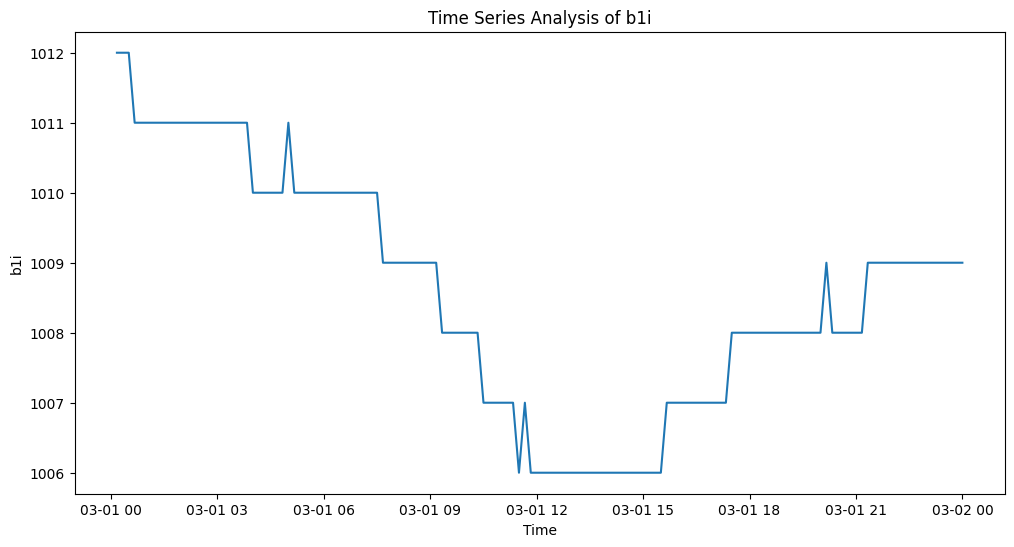

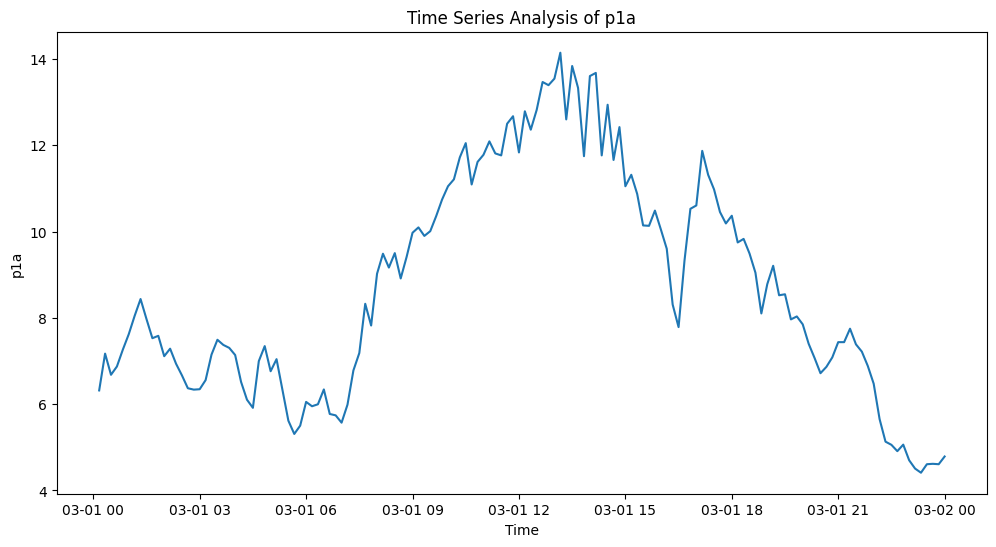

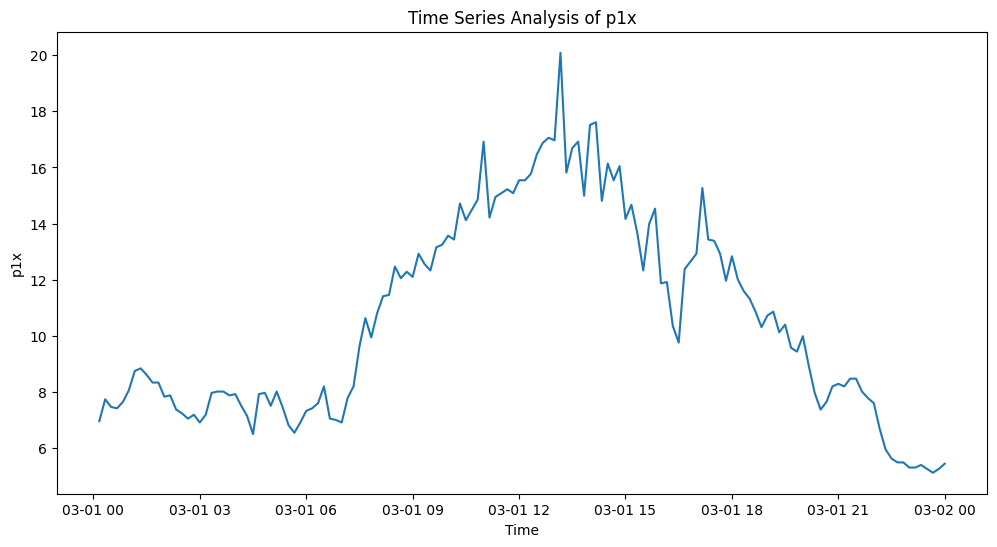

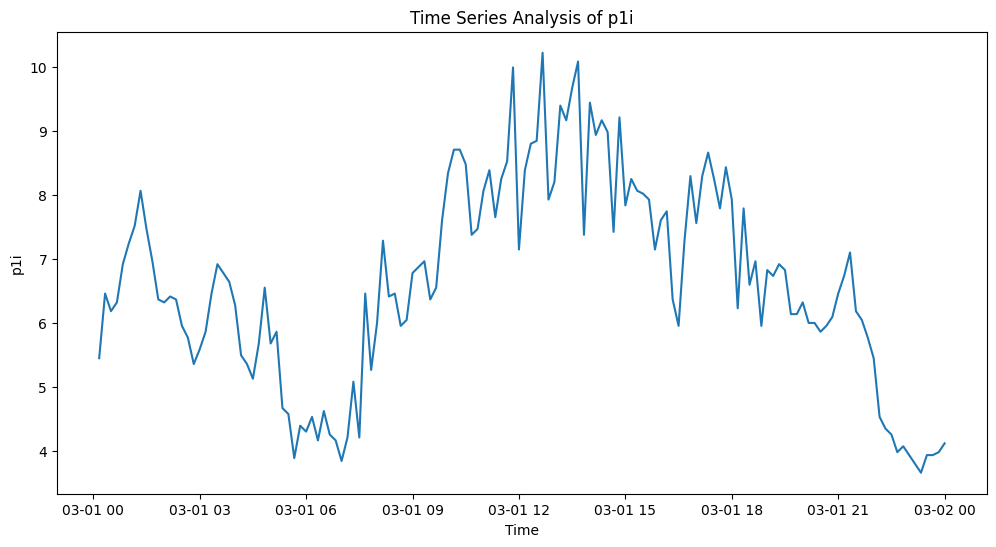

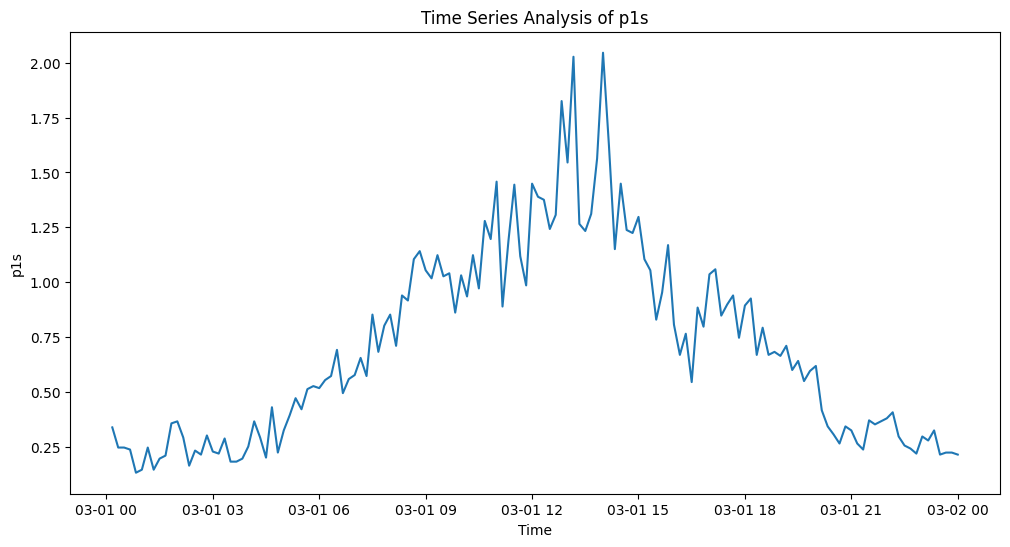

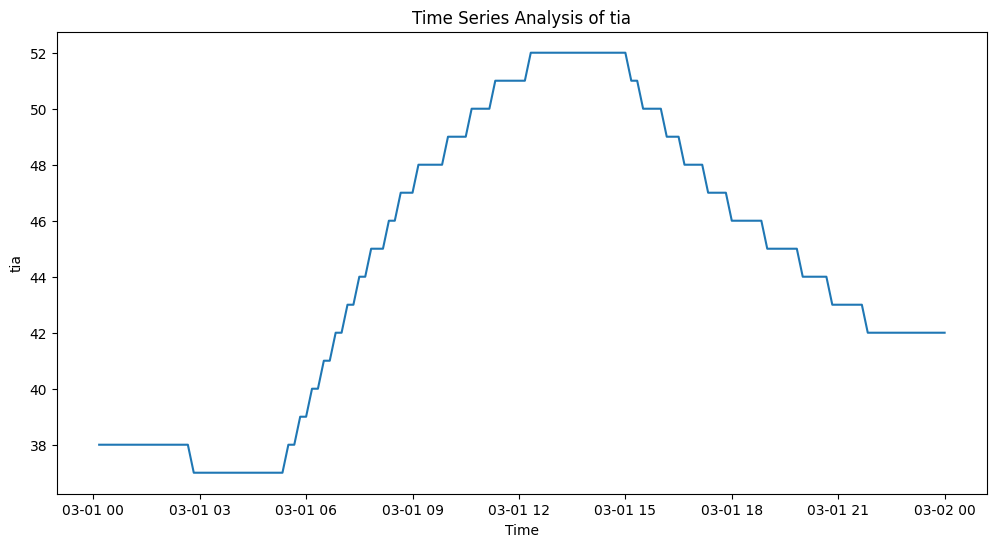

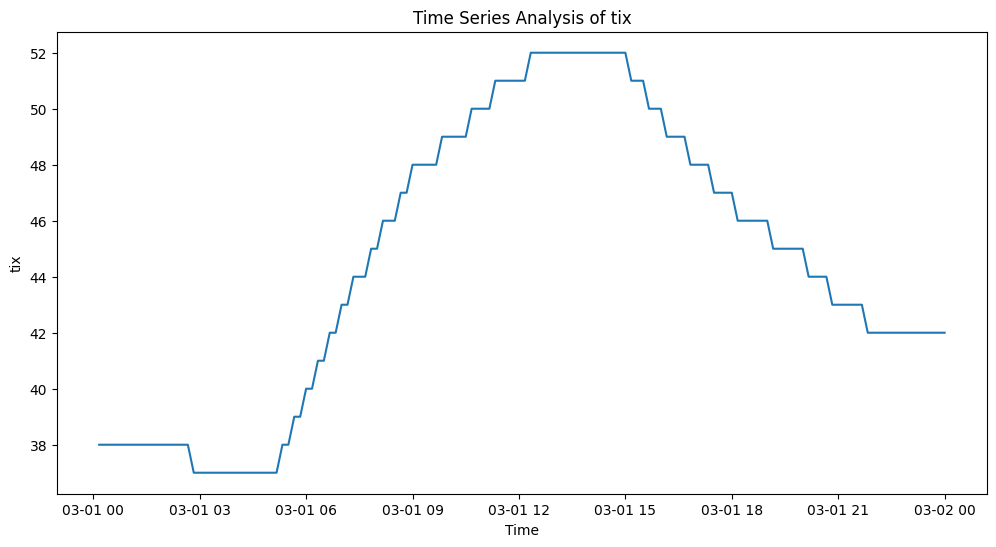

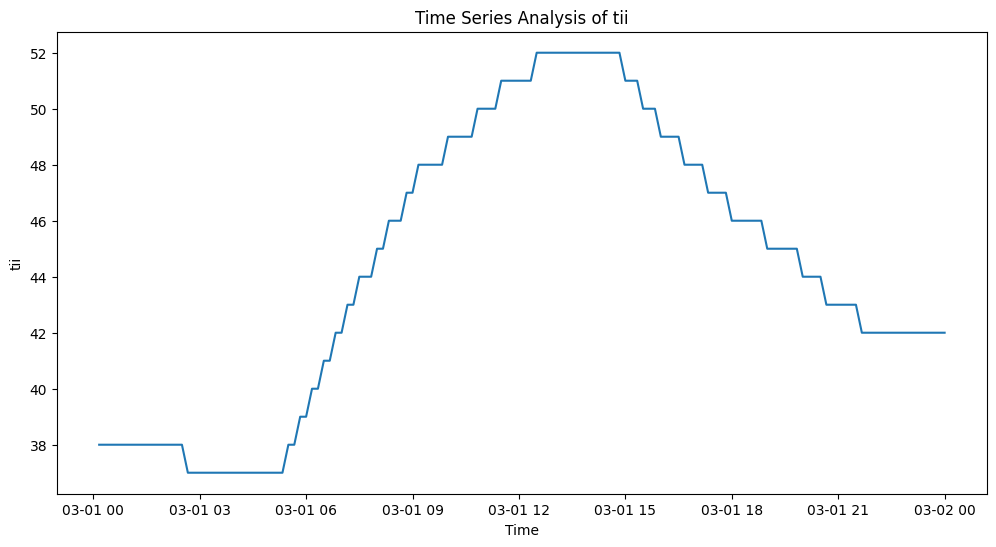

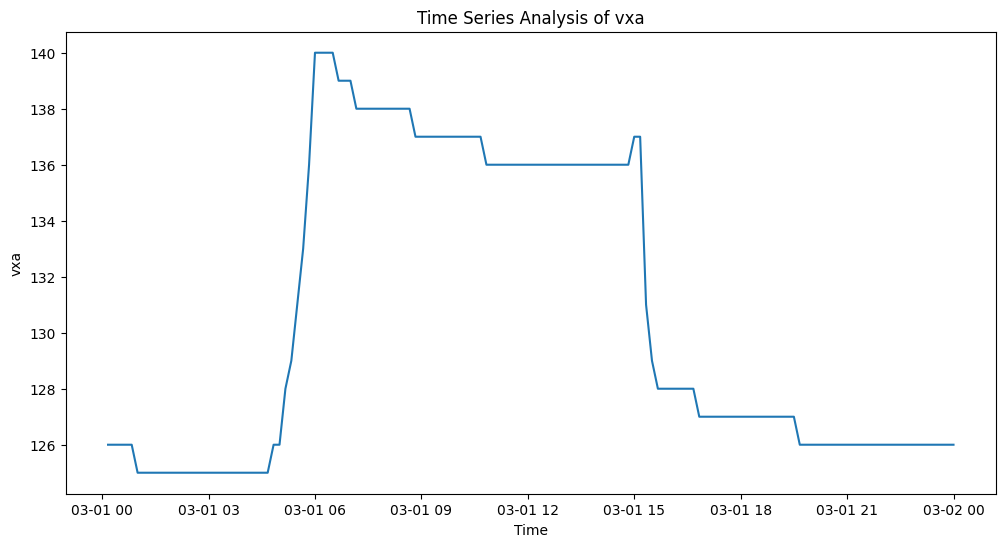

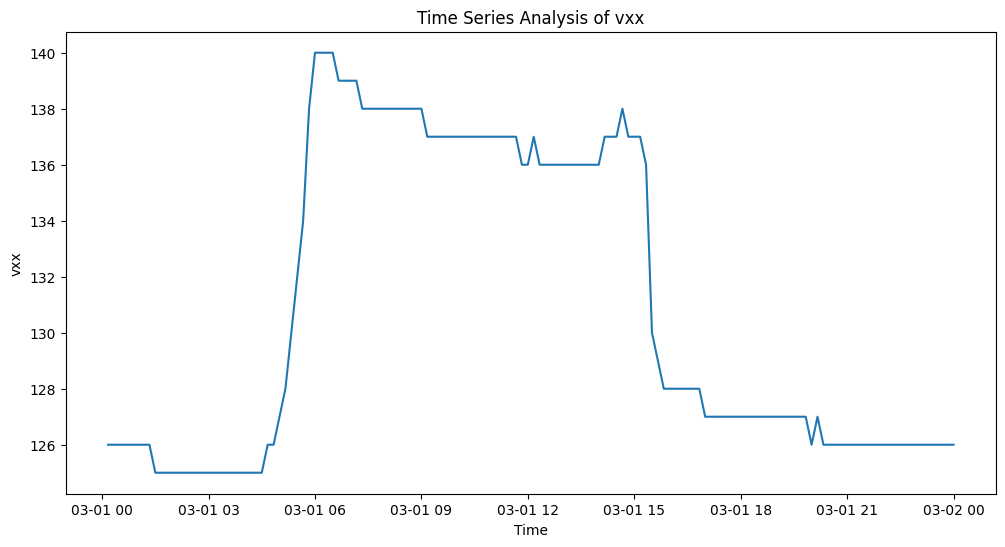

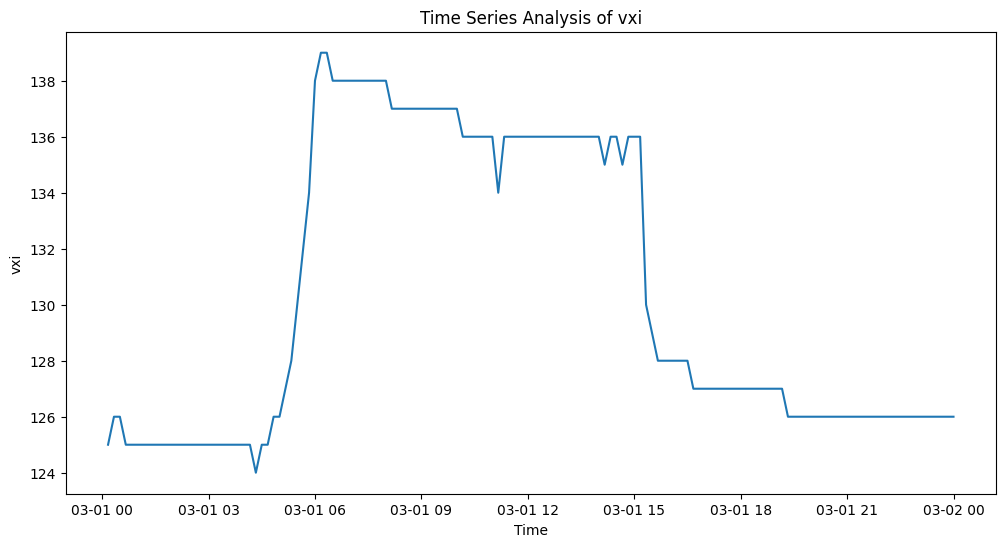

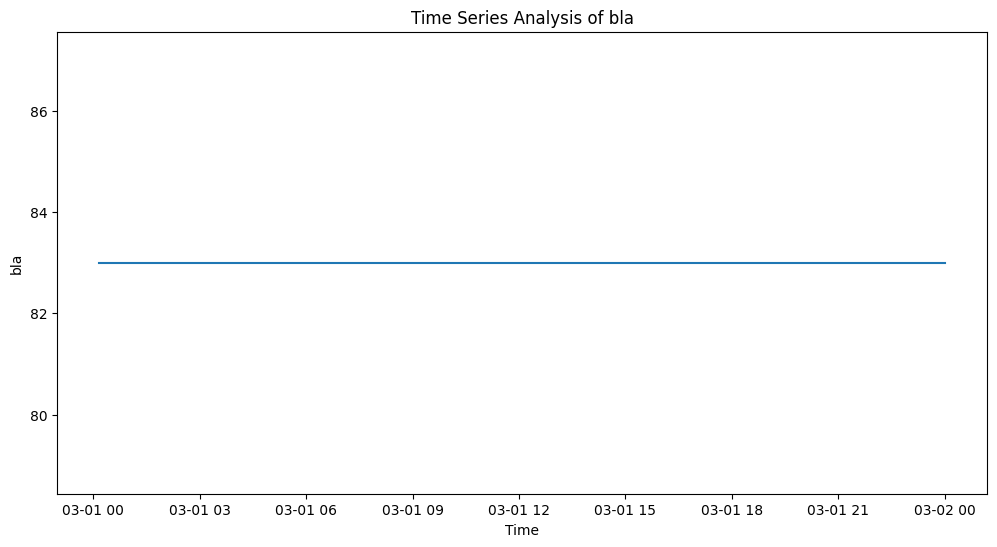

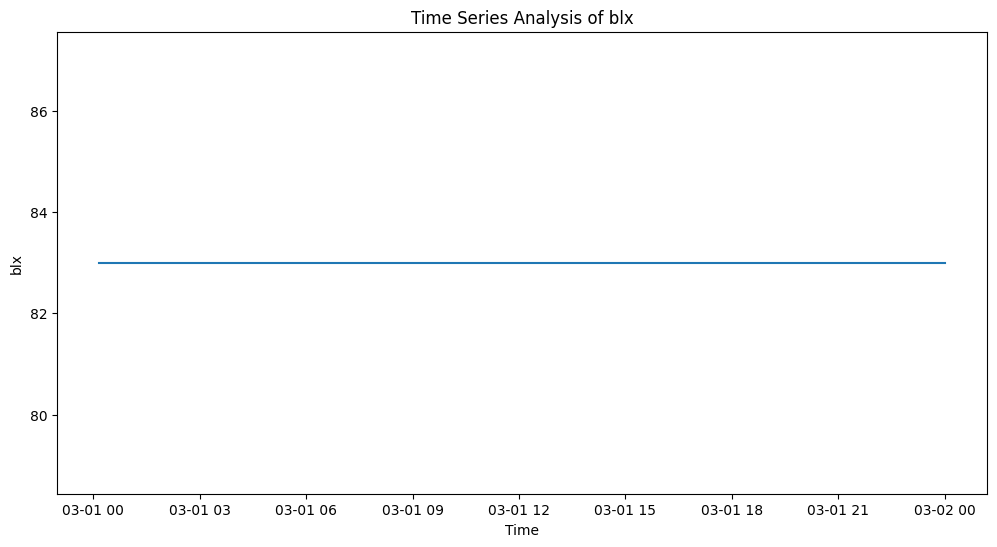

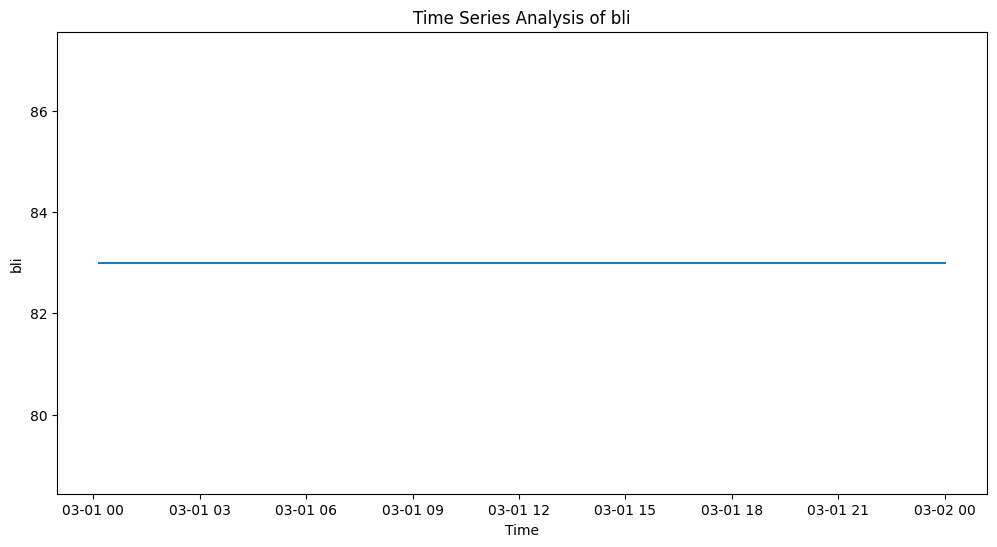

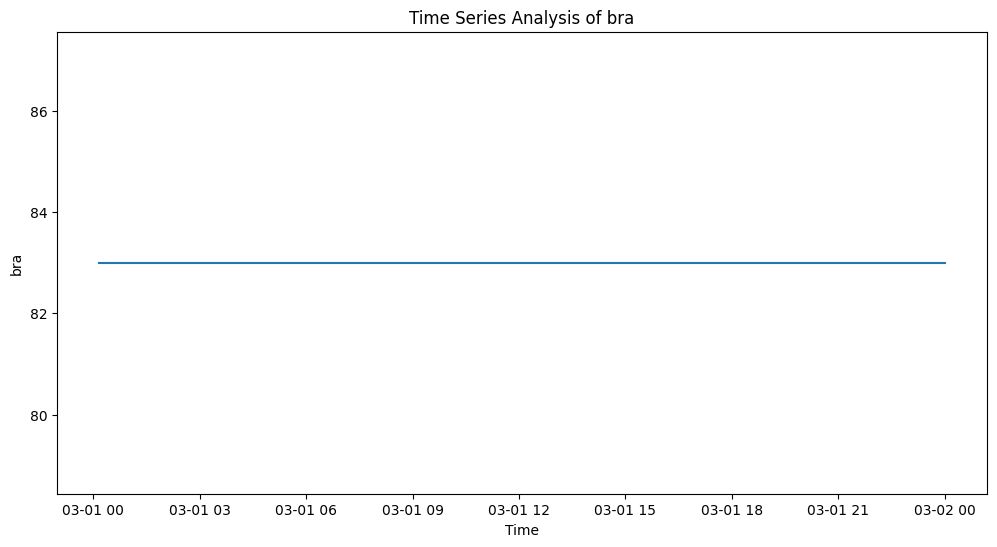

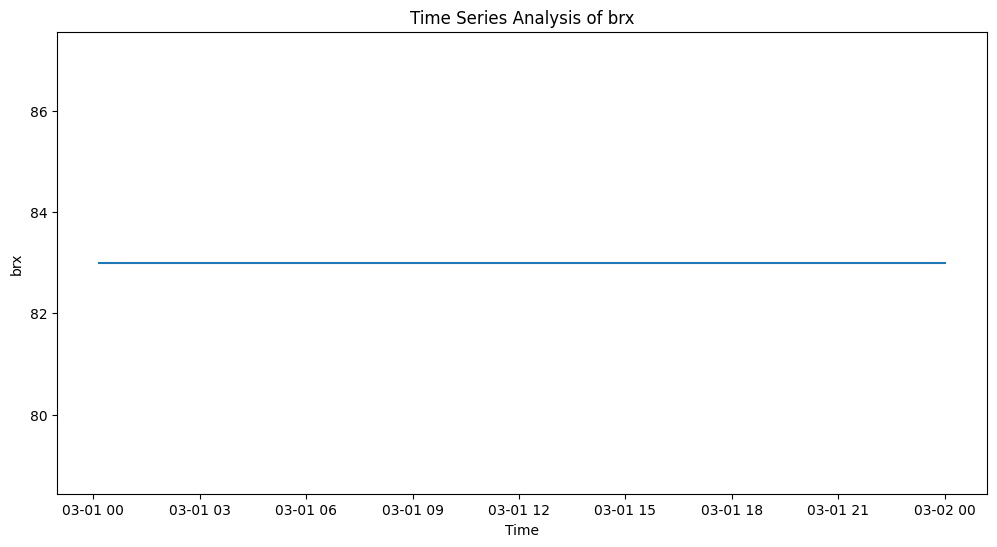

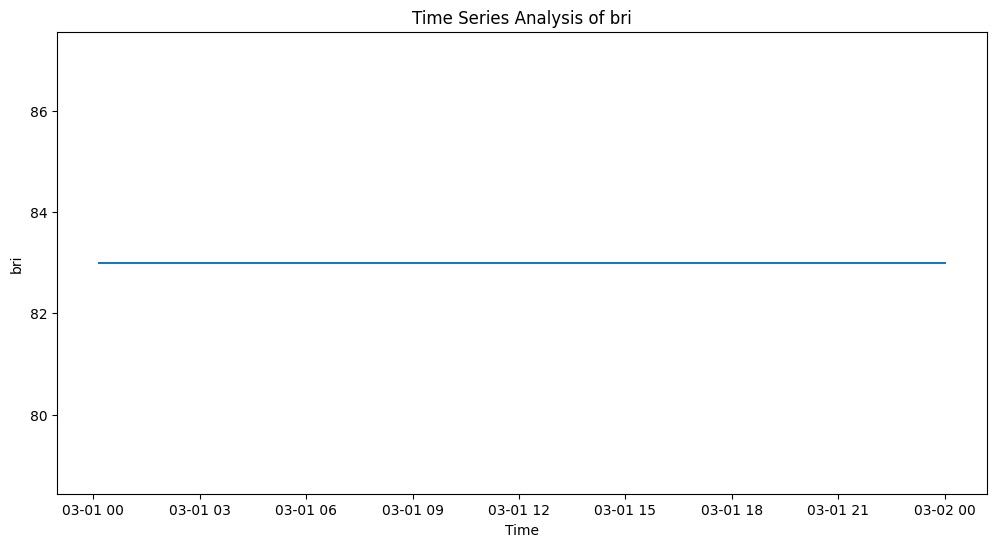

In [127]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [101]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

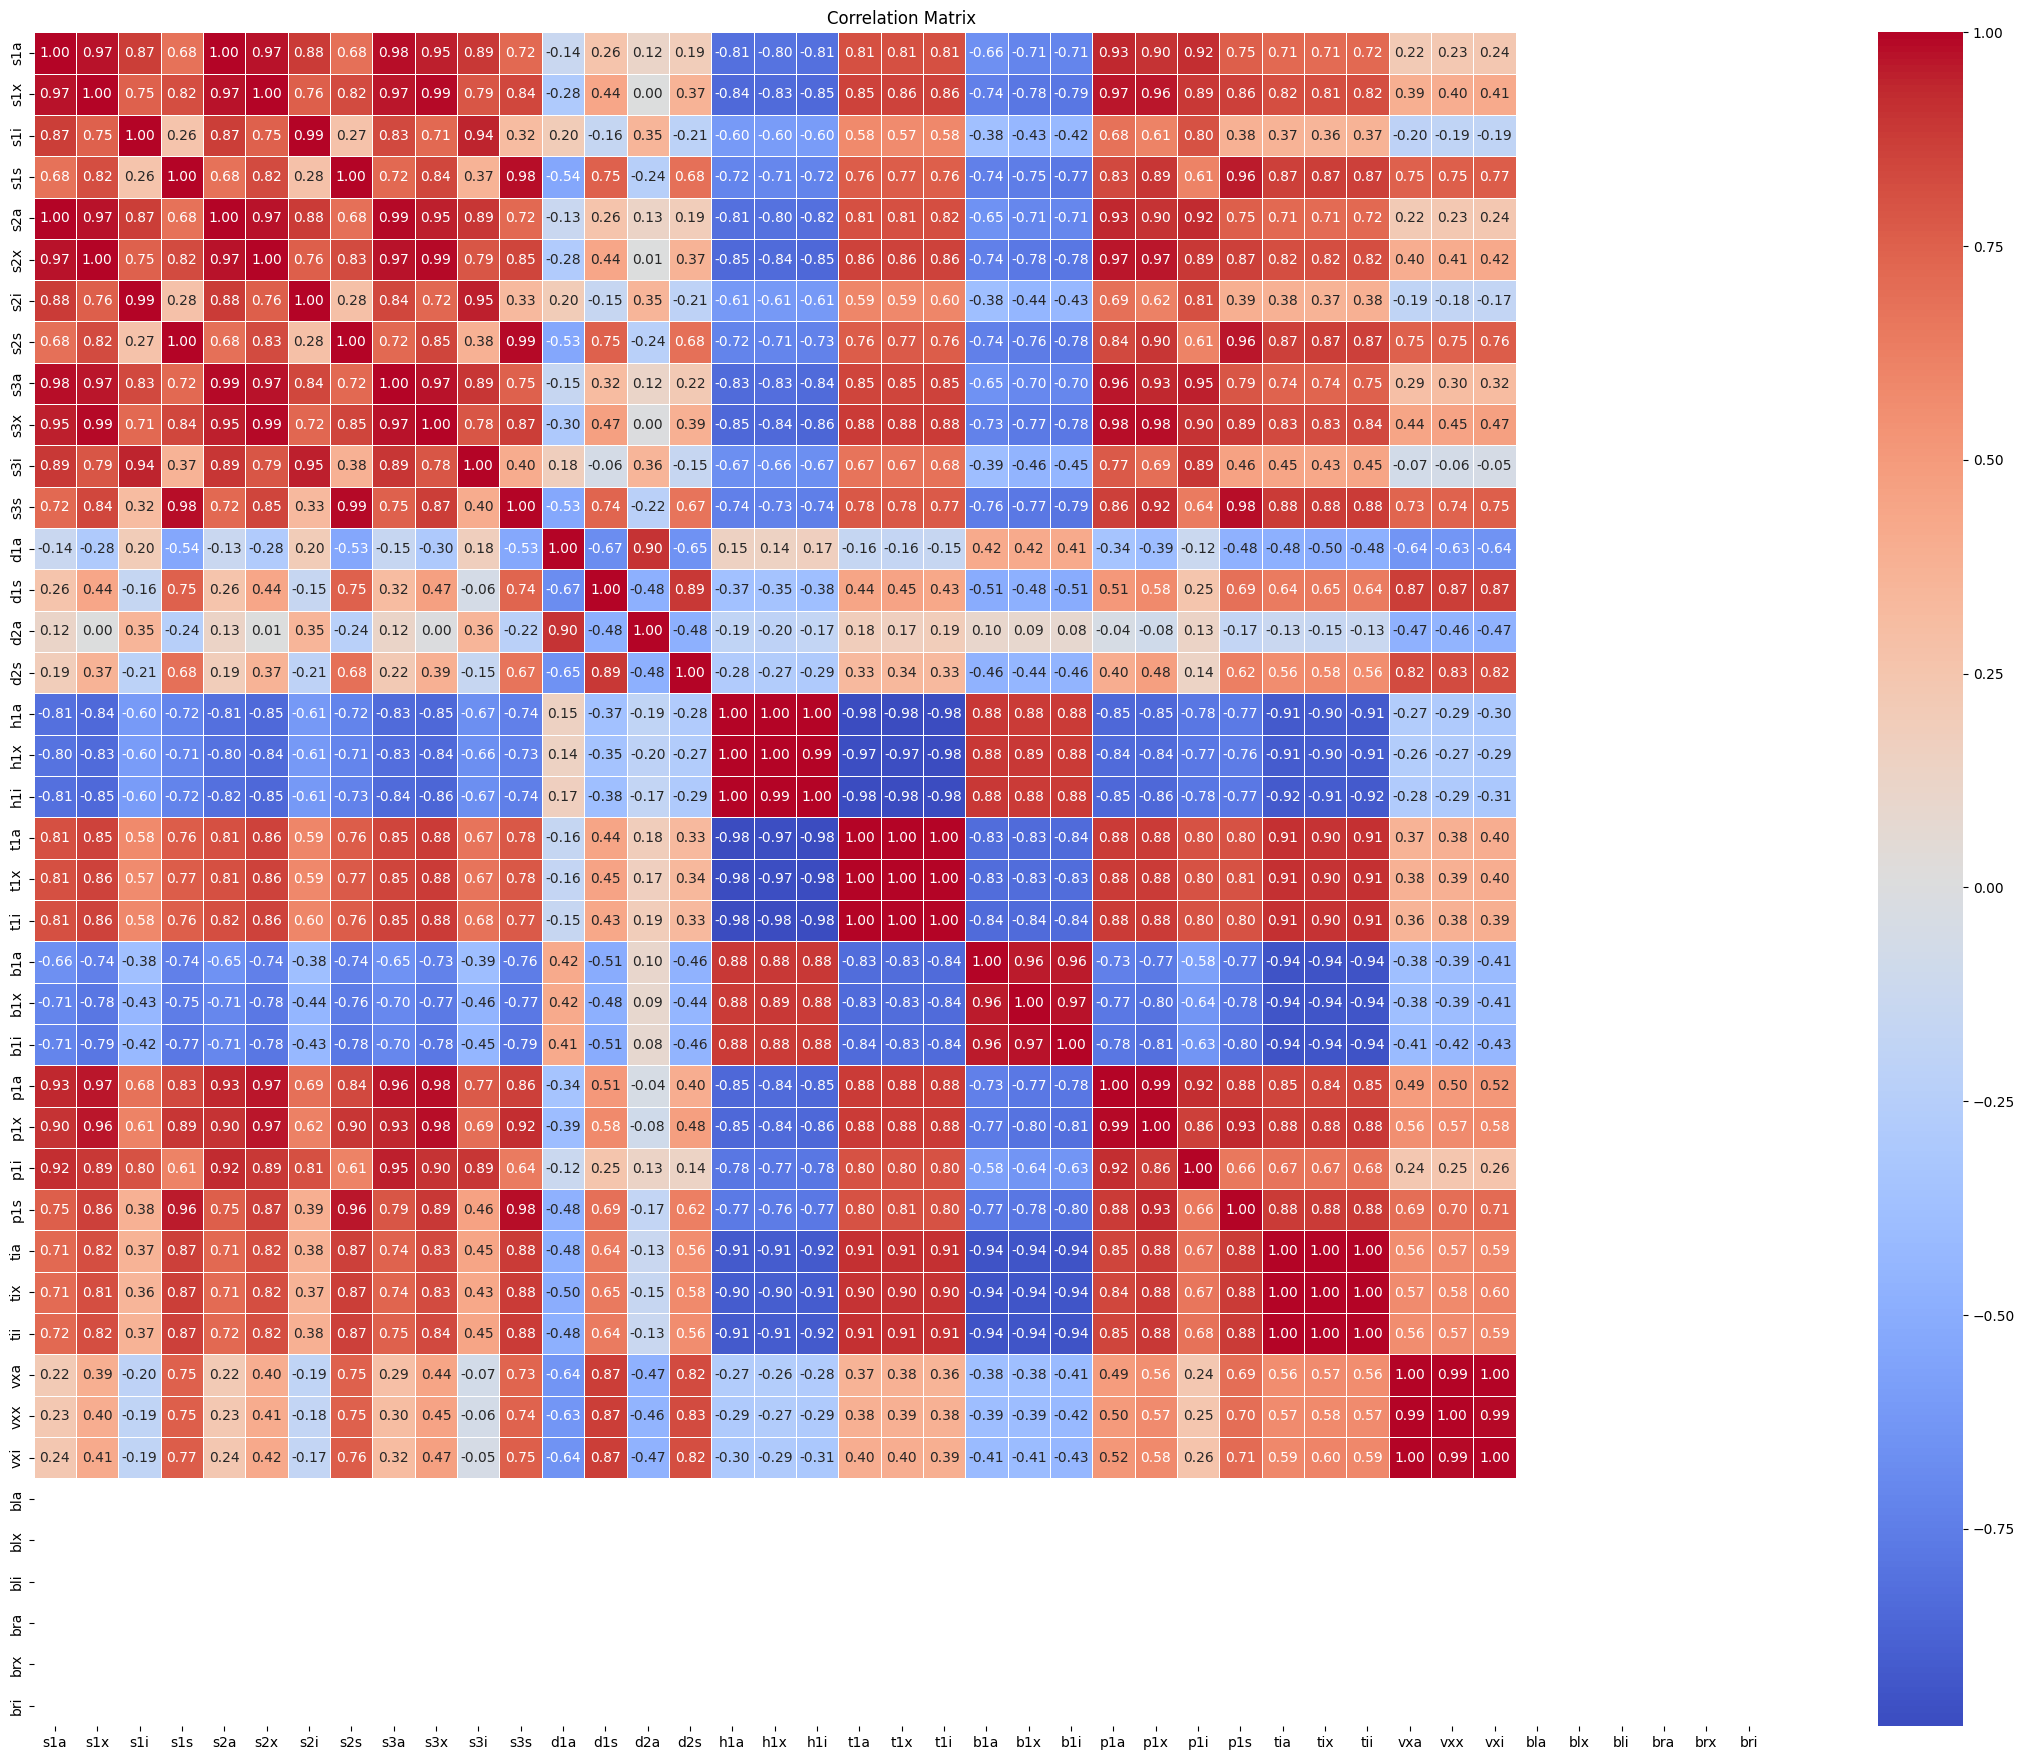

In [102]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

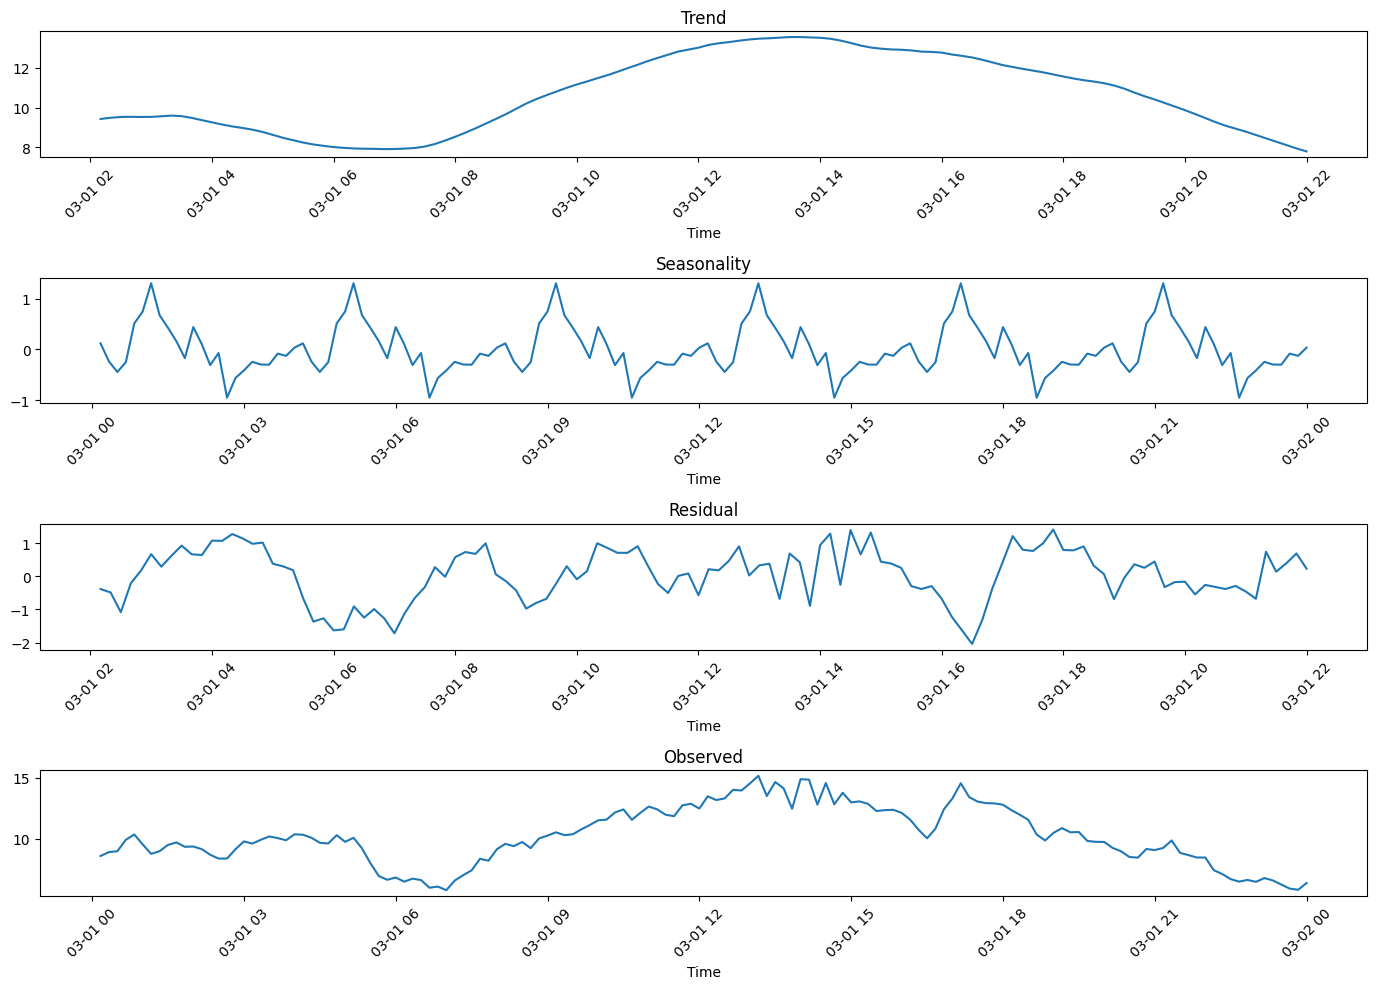

In [130]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


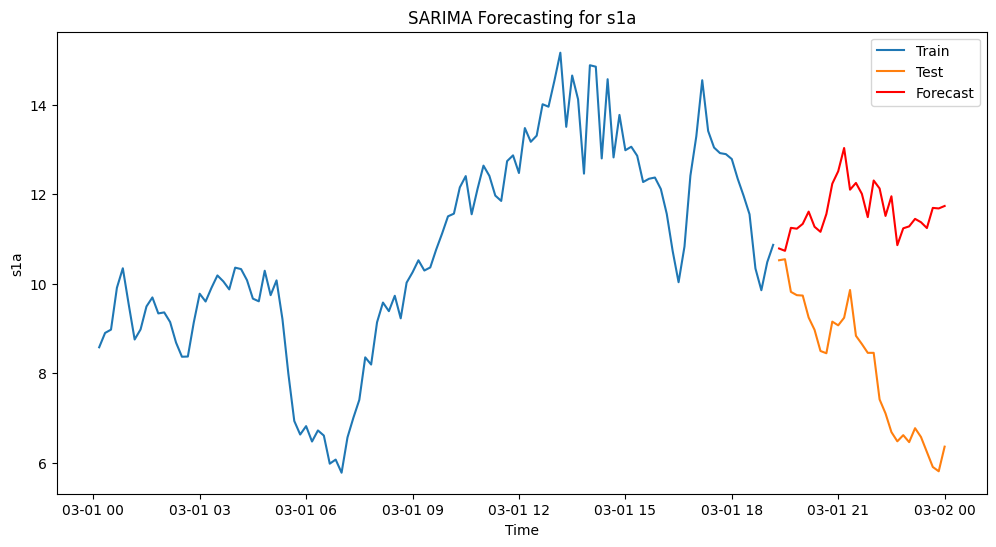

In [135]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()